In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,20)
plt.rcParams['figure.dpi']=200
import warnings
warnings.filterwarnings('ignore')


In [57]:
df=pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Clustering/EastWestAirlines1.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [58]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [60]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [61]:
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'ID#'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>],
       [<AxesSubplot:title={'center':'cc1_miles'}>,
        <AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>],
       [<AxesSubplot:title={'center':'Flight_trans_12'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:title={'center':'Award?'}>]], dtype=object)

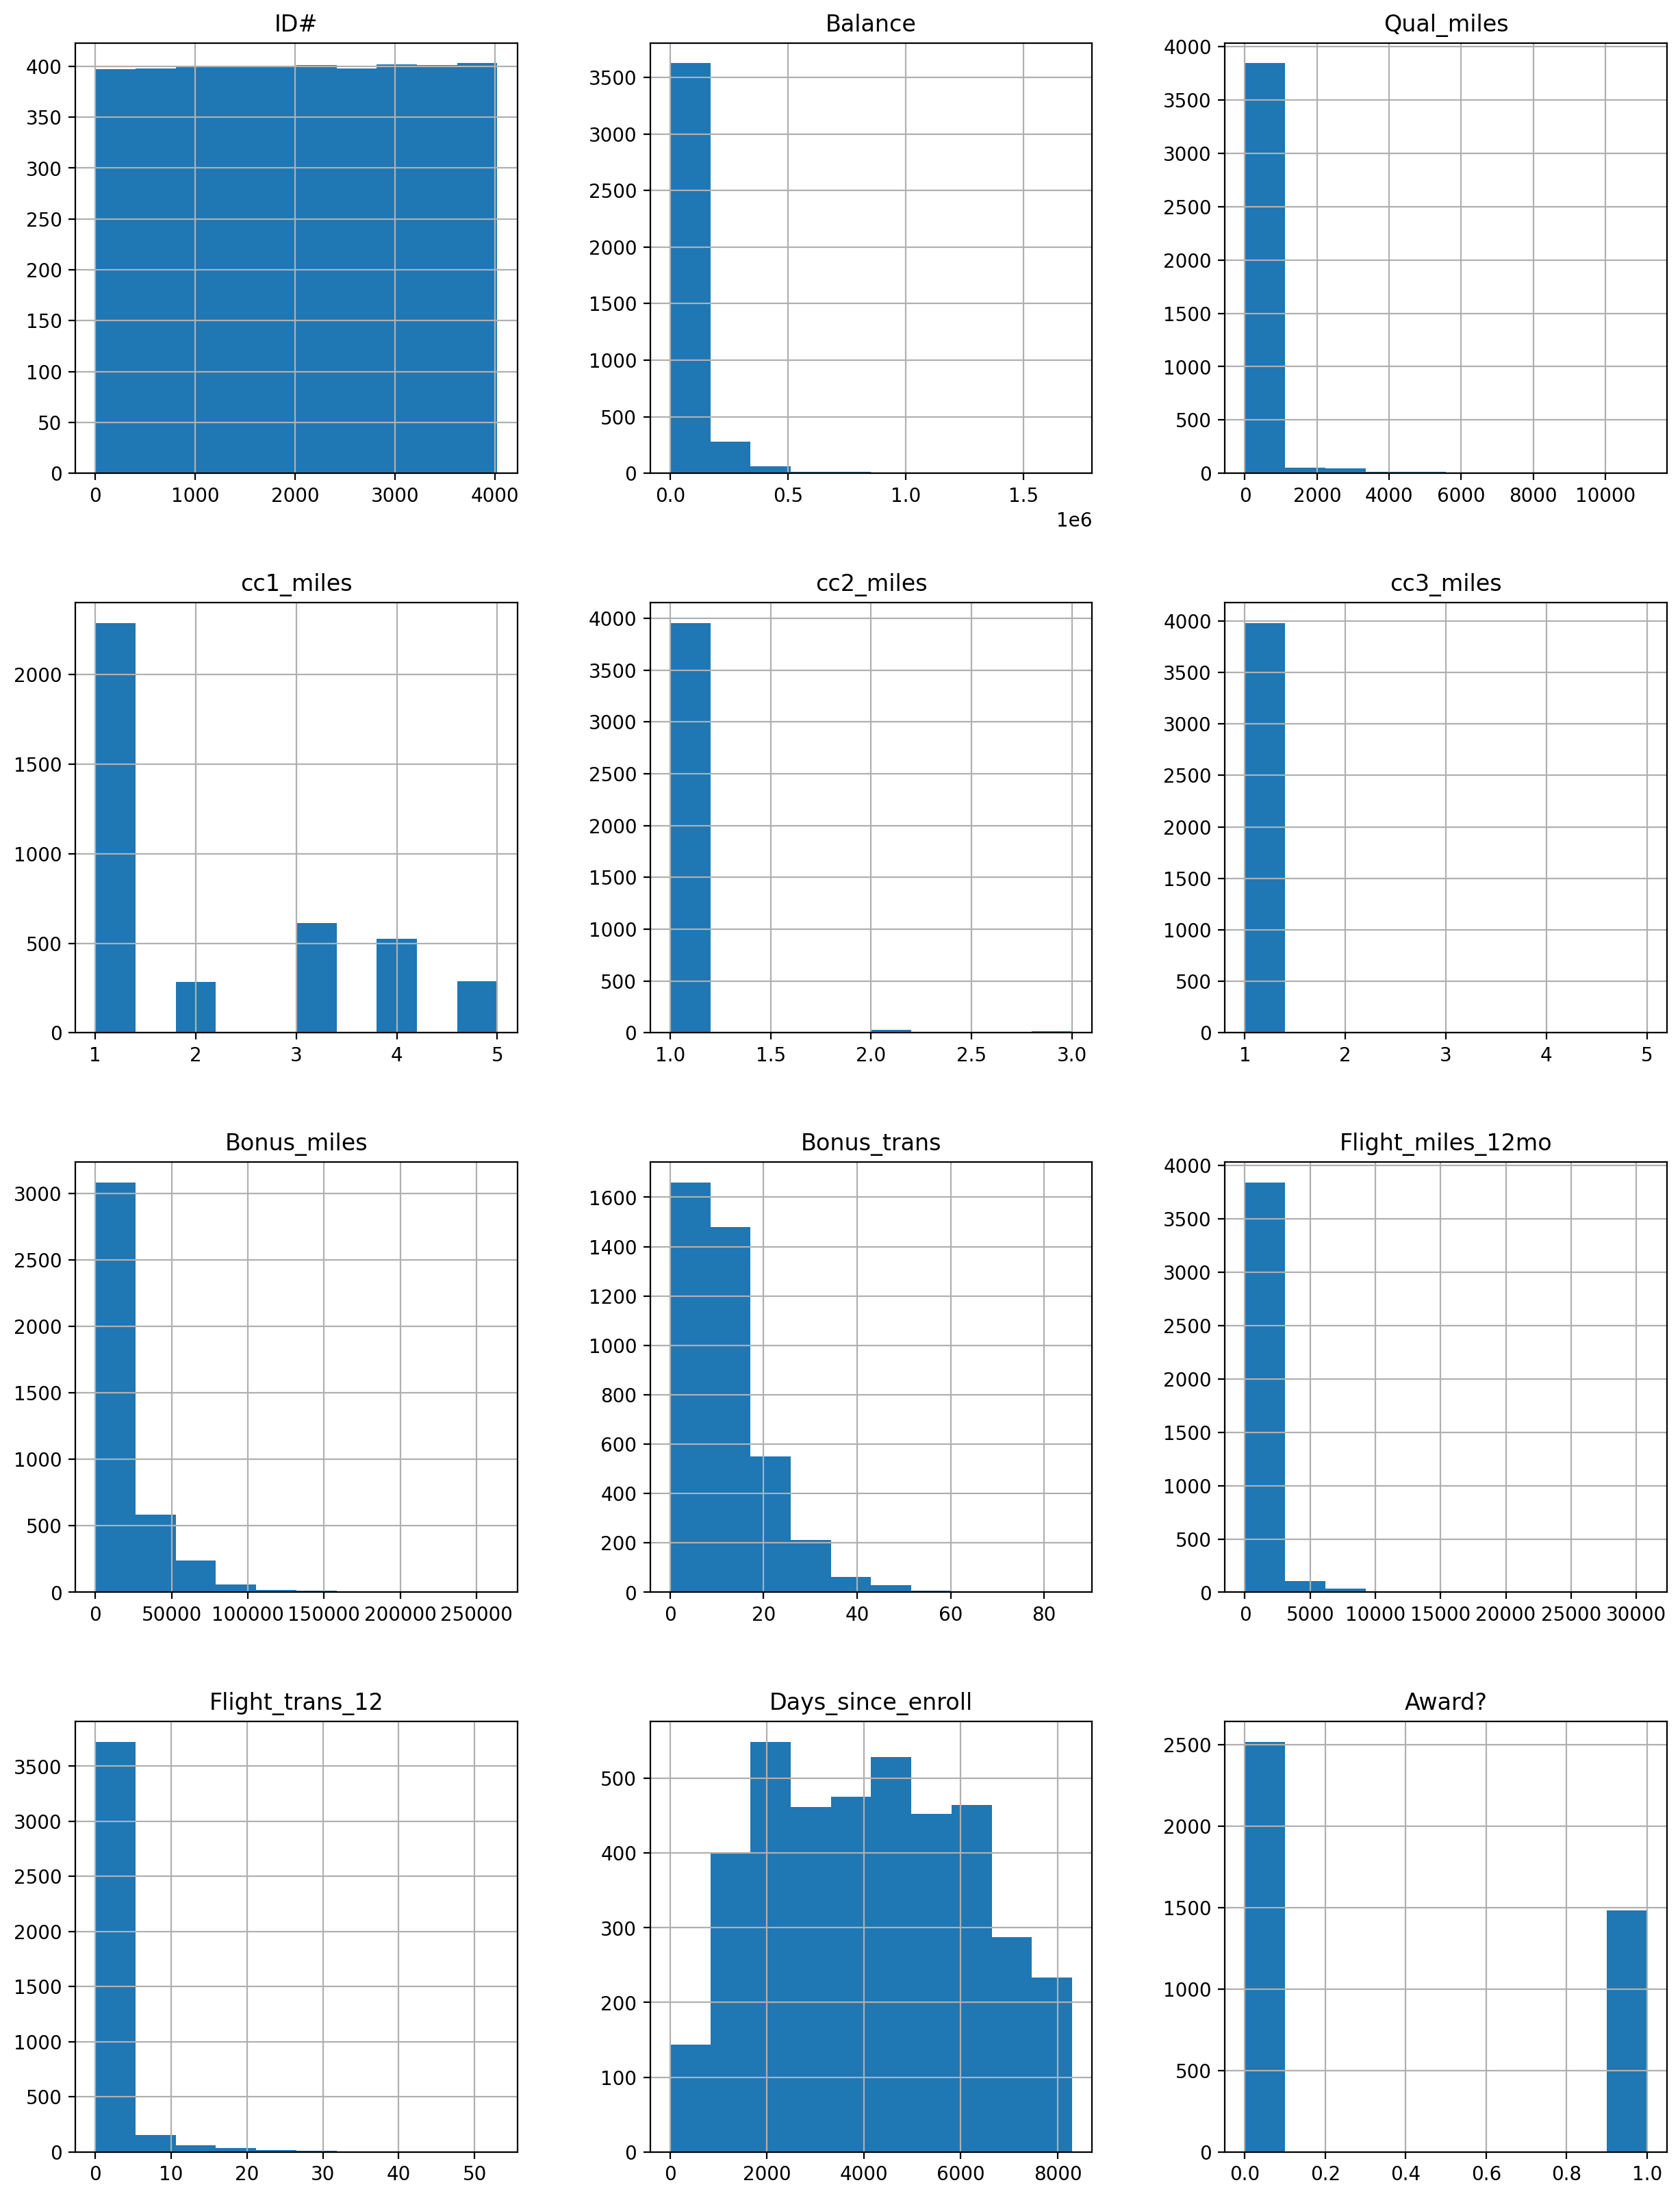

In [63]:
df.hist()

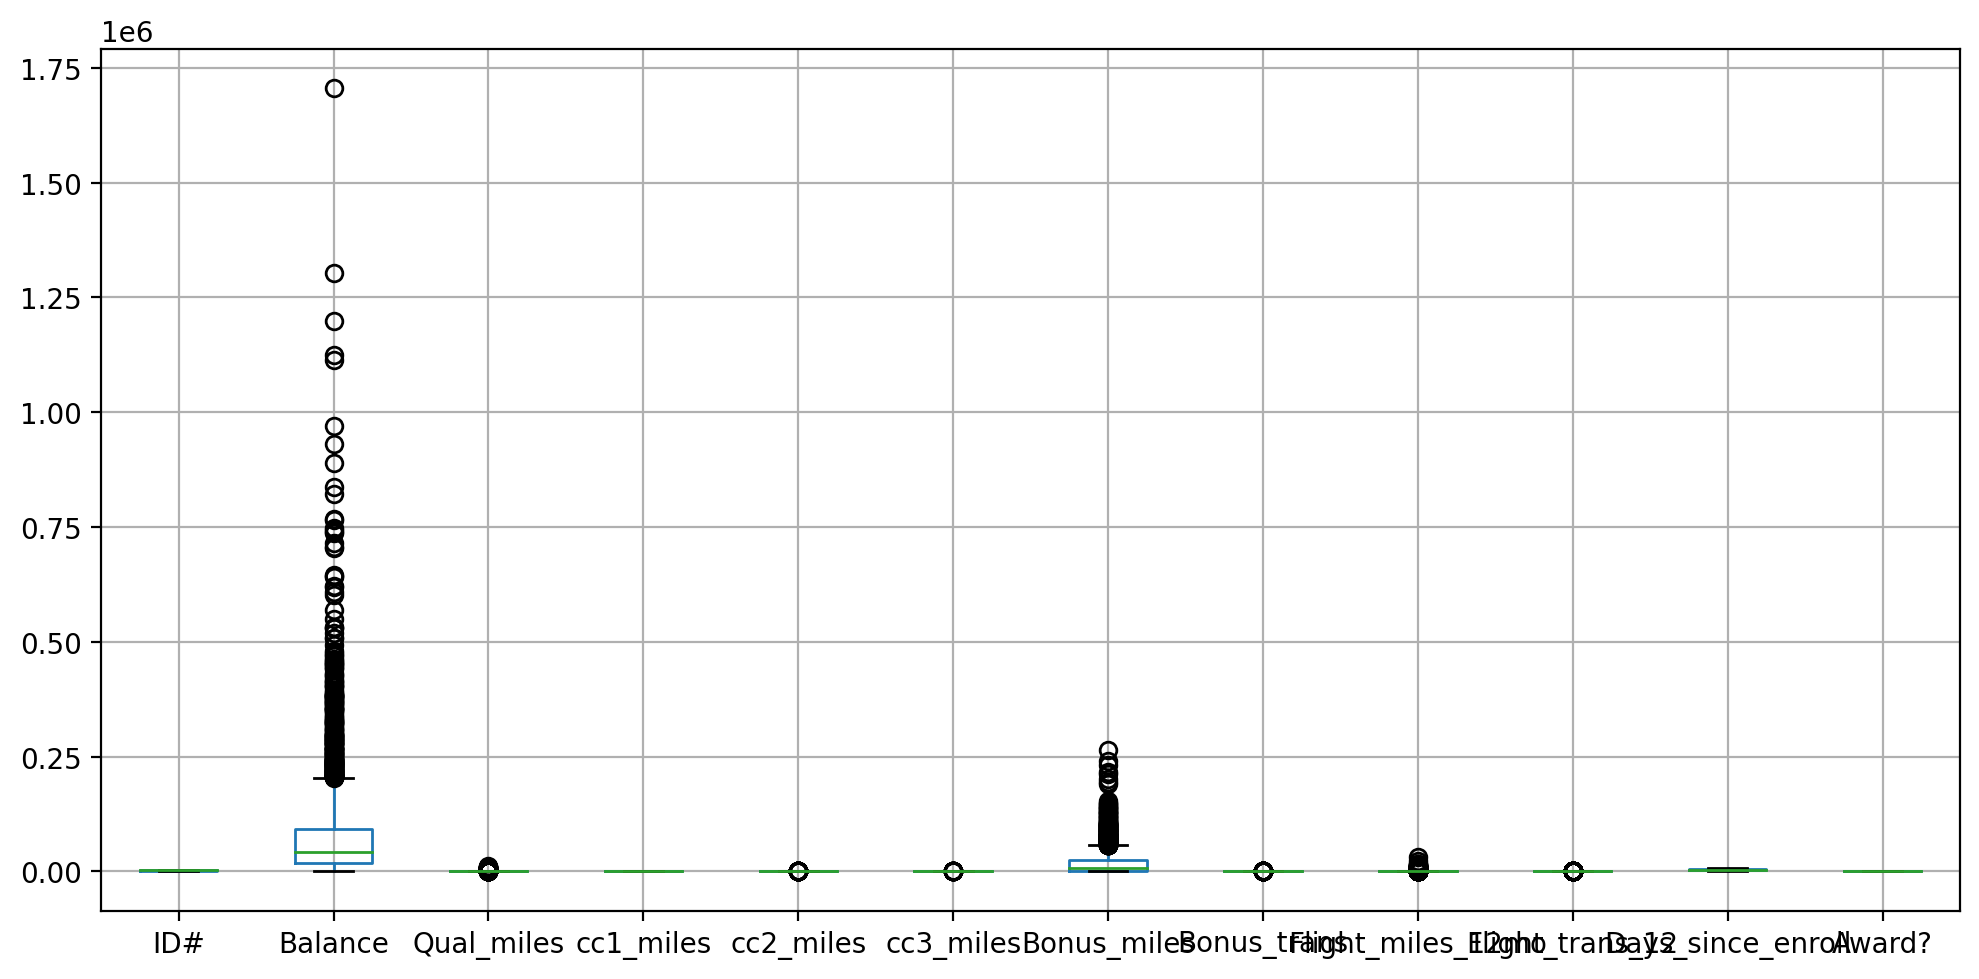

In [42]:
df.boxplot()
plt.tight_layout()

In [64]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    upper = q3 +(1.5*iqr)
    lower =q1 + (1.5*iqr)
    
    return upper,lower

In [65]:
outlier_detection(df,'Balance')

(203218.75, 129342.25)

In [91]:
df.loc[df['Balance']>203218.75,'Balance']=203218.75

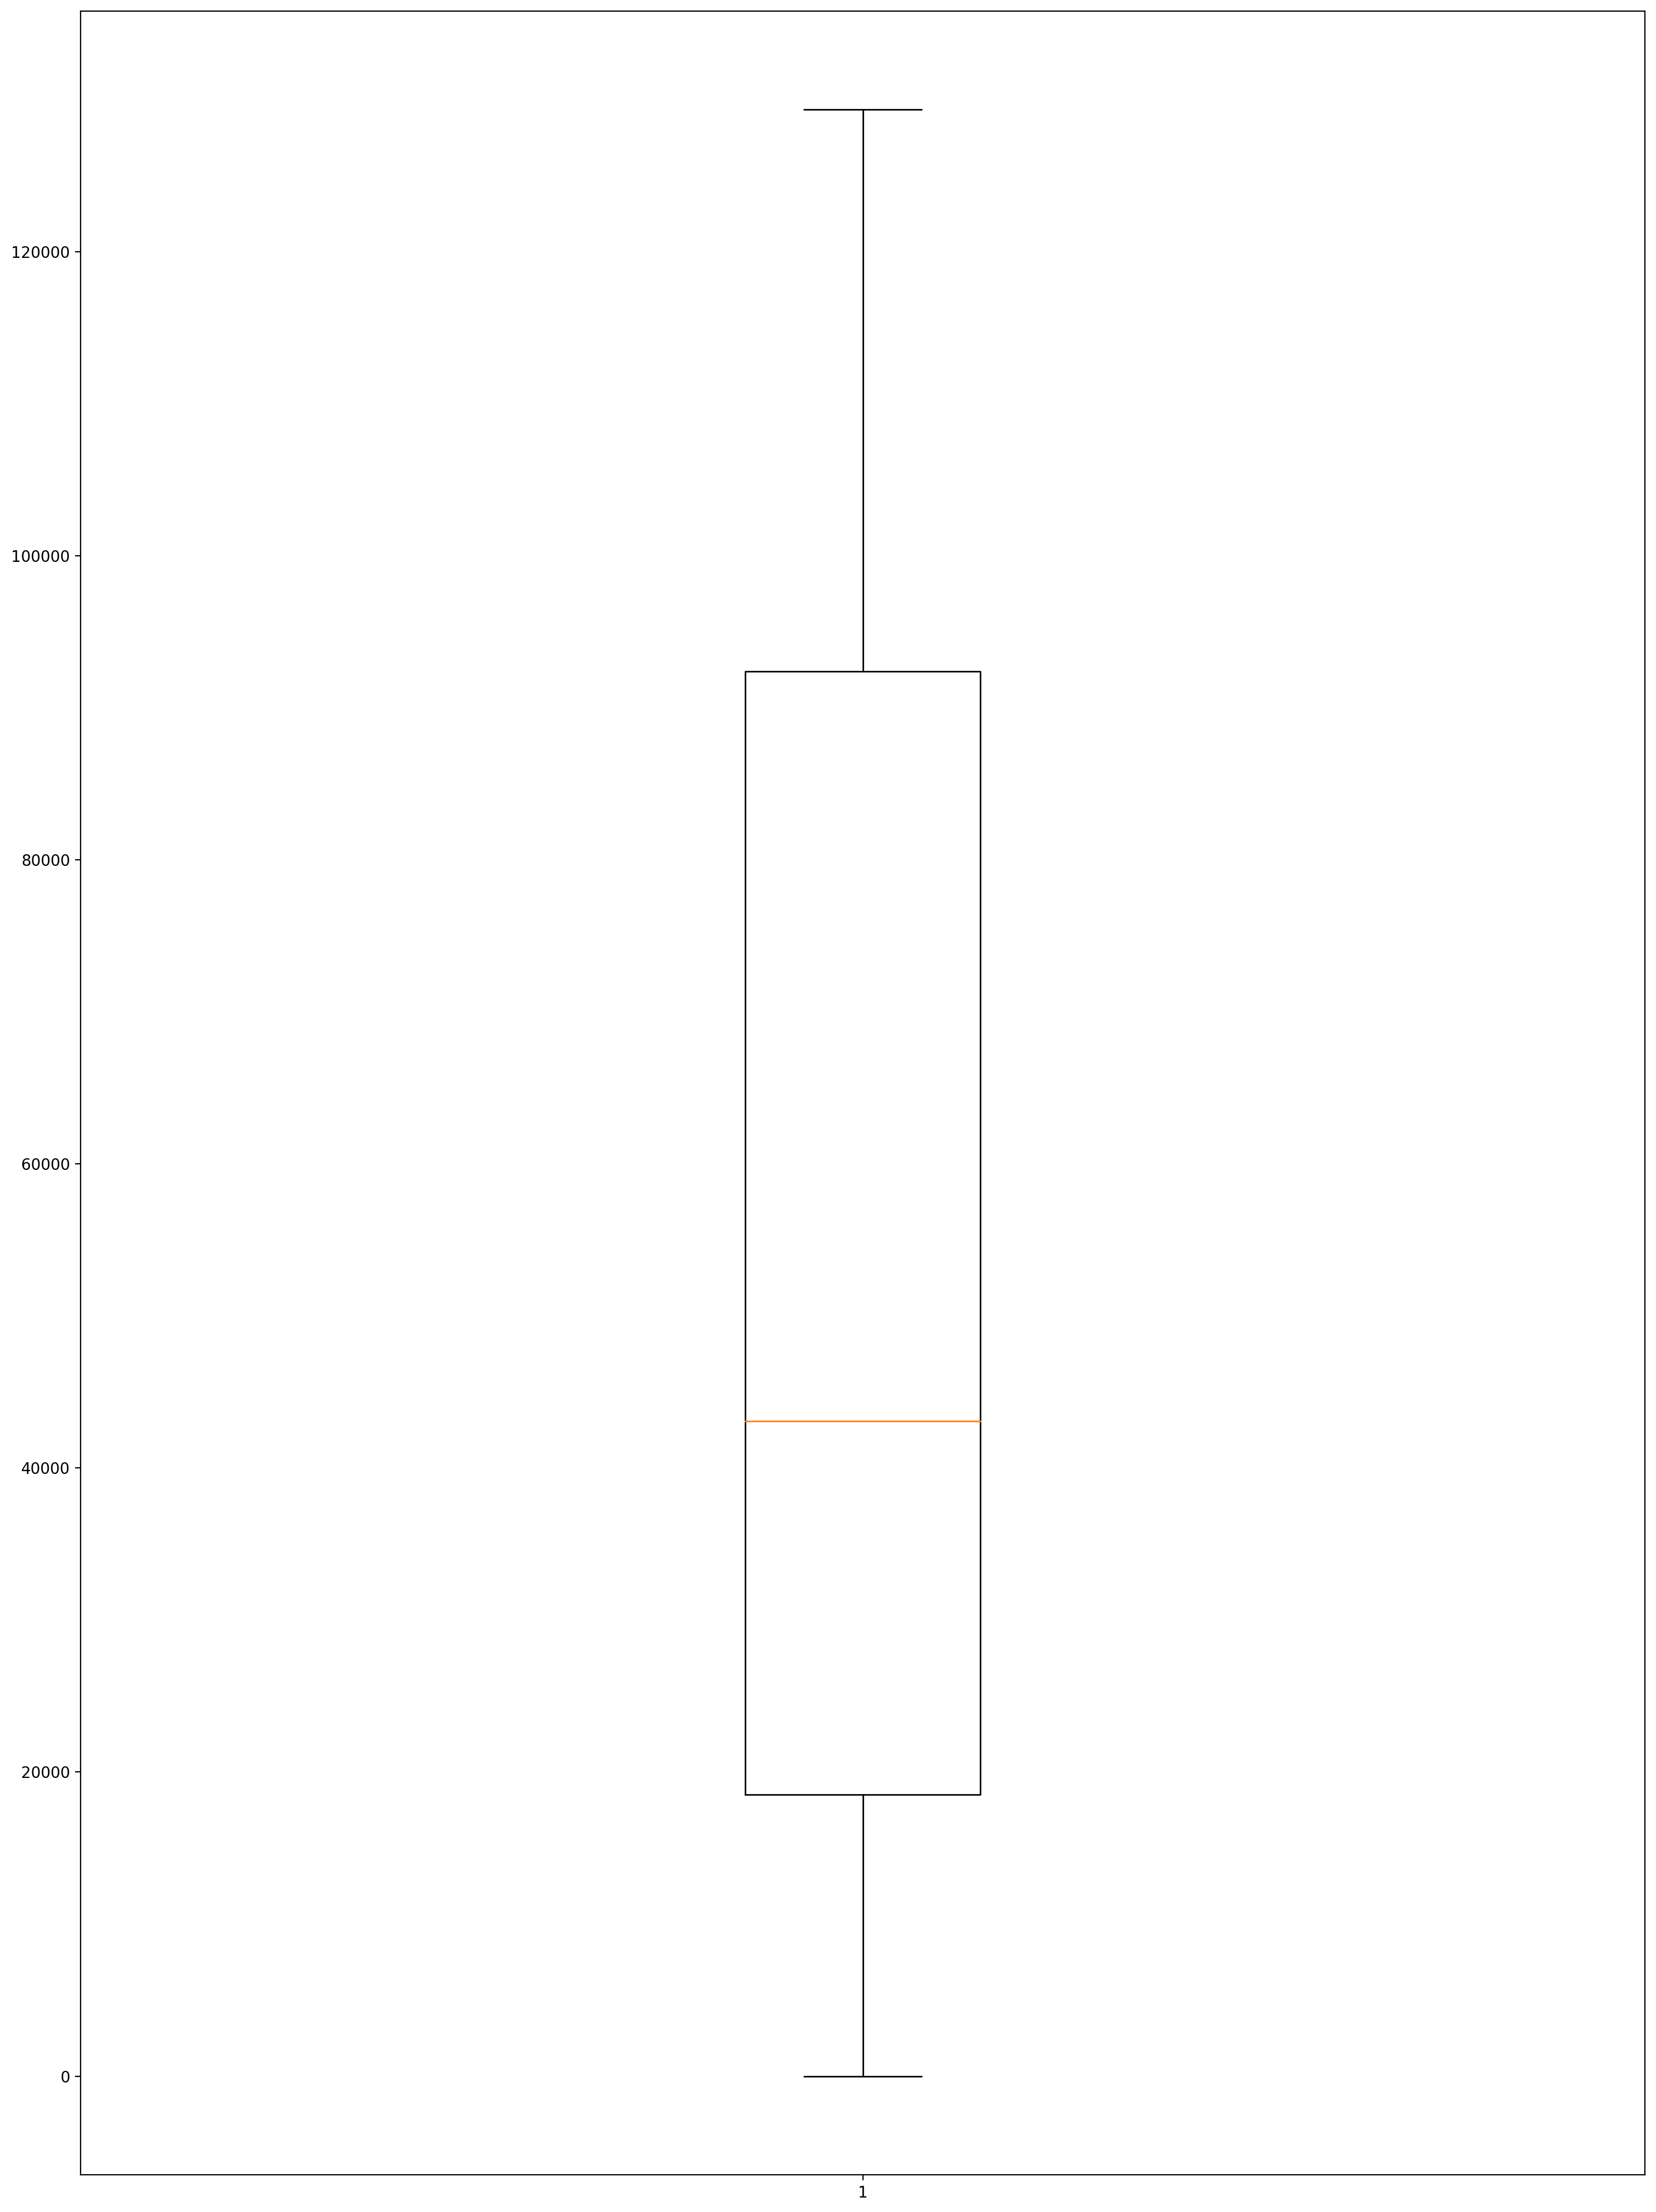

In [100]:
plt.boxplot(df['Balance'])
plt.tight_layout()

In [117]:
outlier_detection(df,'cc1_miles')

(6.0, 4.0)

In [118]:
outlier_detection(df,'cc2_miles')

(1.0, 1.0)

In [119]:
outlier_detection(df,'cc3_miles')


(1.0, 1.0)

In [120]:
outlier_detection(df,'Bonus_miles')

(57626.25, 35075.75)

In [121]:
df.loc[df['Bonus_miles']>57626.25,'Bonus_miles']=57626.25

In [122]:
outlier_detection(df,'Bonus_trans')

(35.5, 22.5)

In [123]:
df.loc[df['Bonus_trans']>38.0,'Bonus_trans']=-38.0

In [124]:
outlier_detection(df,'Flight_miles_12mo')

(777.5, 466.5)

In [125]:
df.loc[df['Flight_miles_12mo']>777.5,'Flight_miles_12mo']=777.5

<AxesSubplot:>

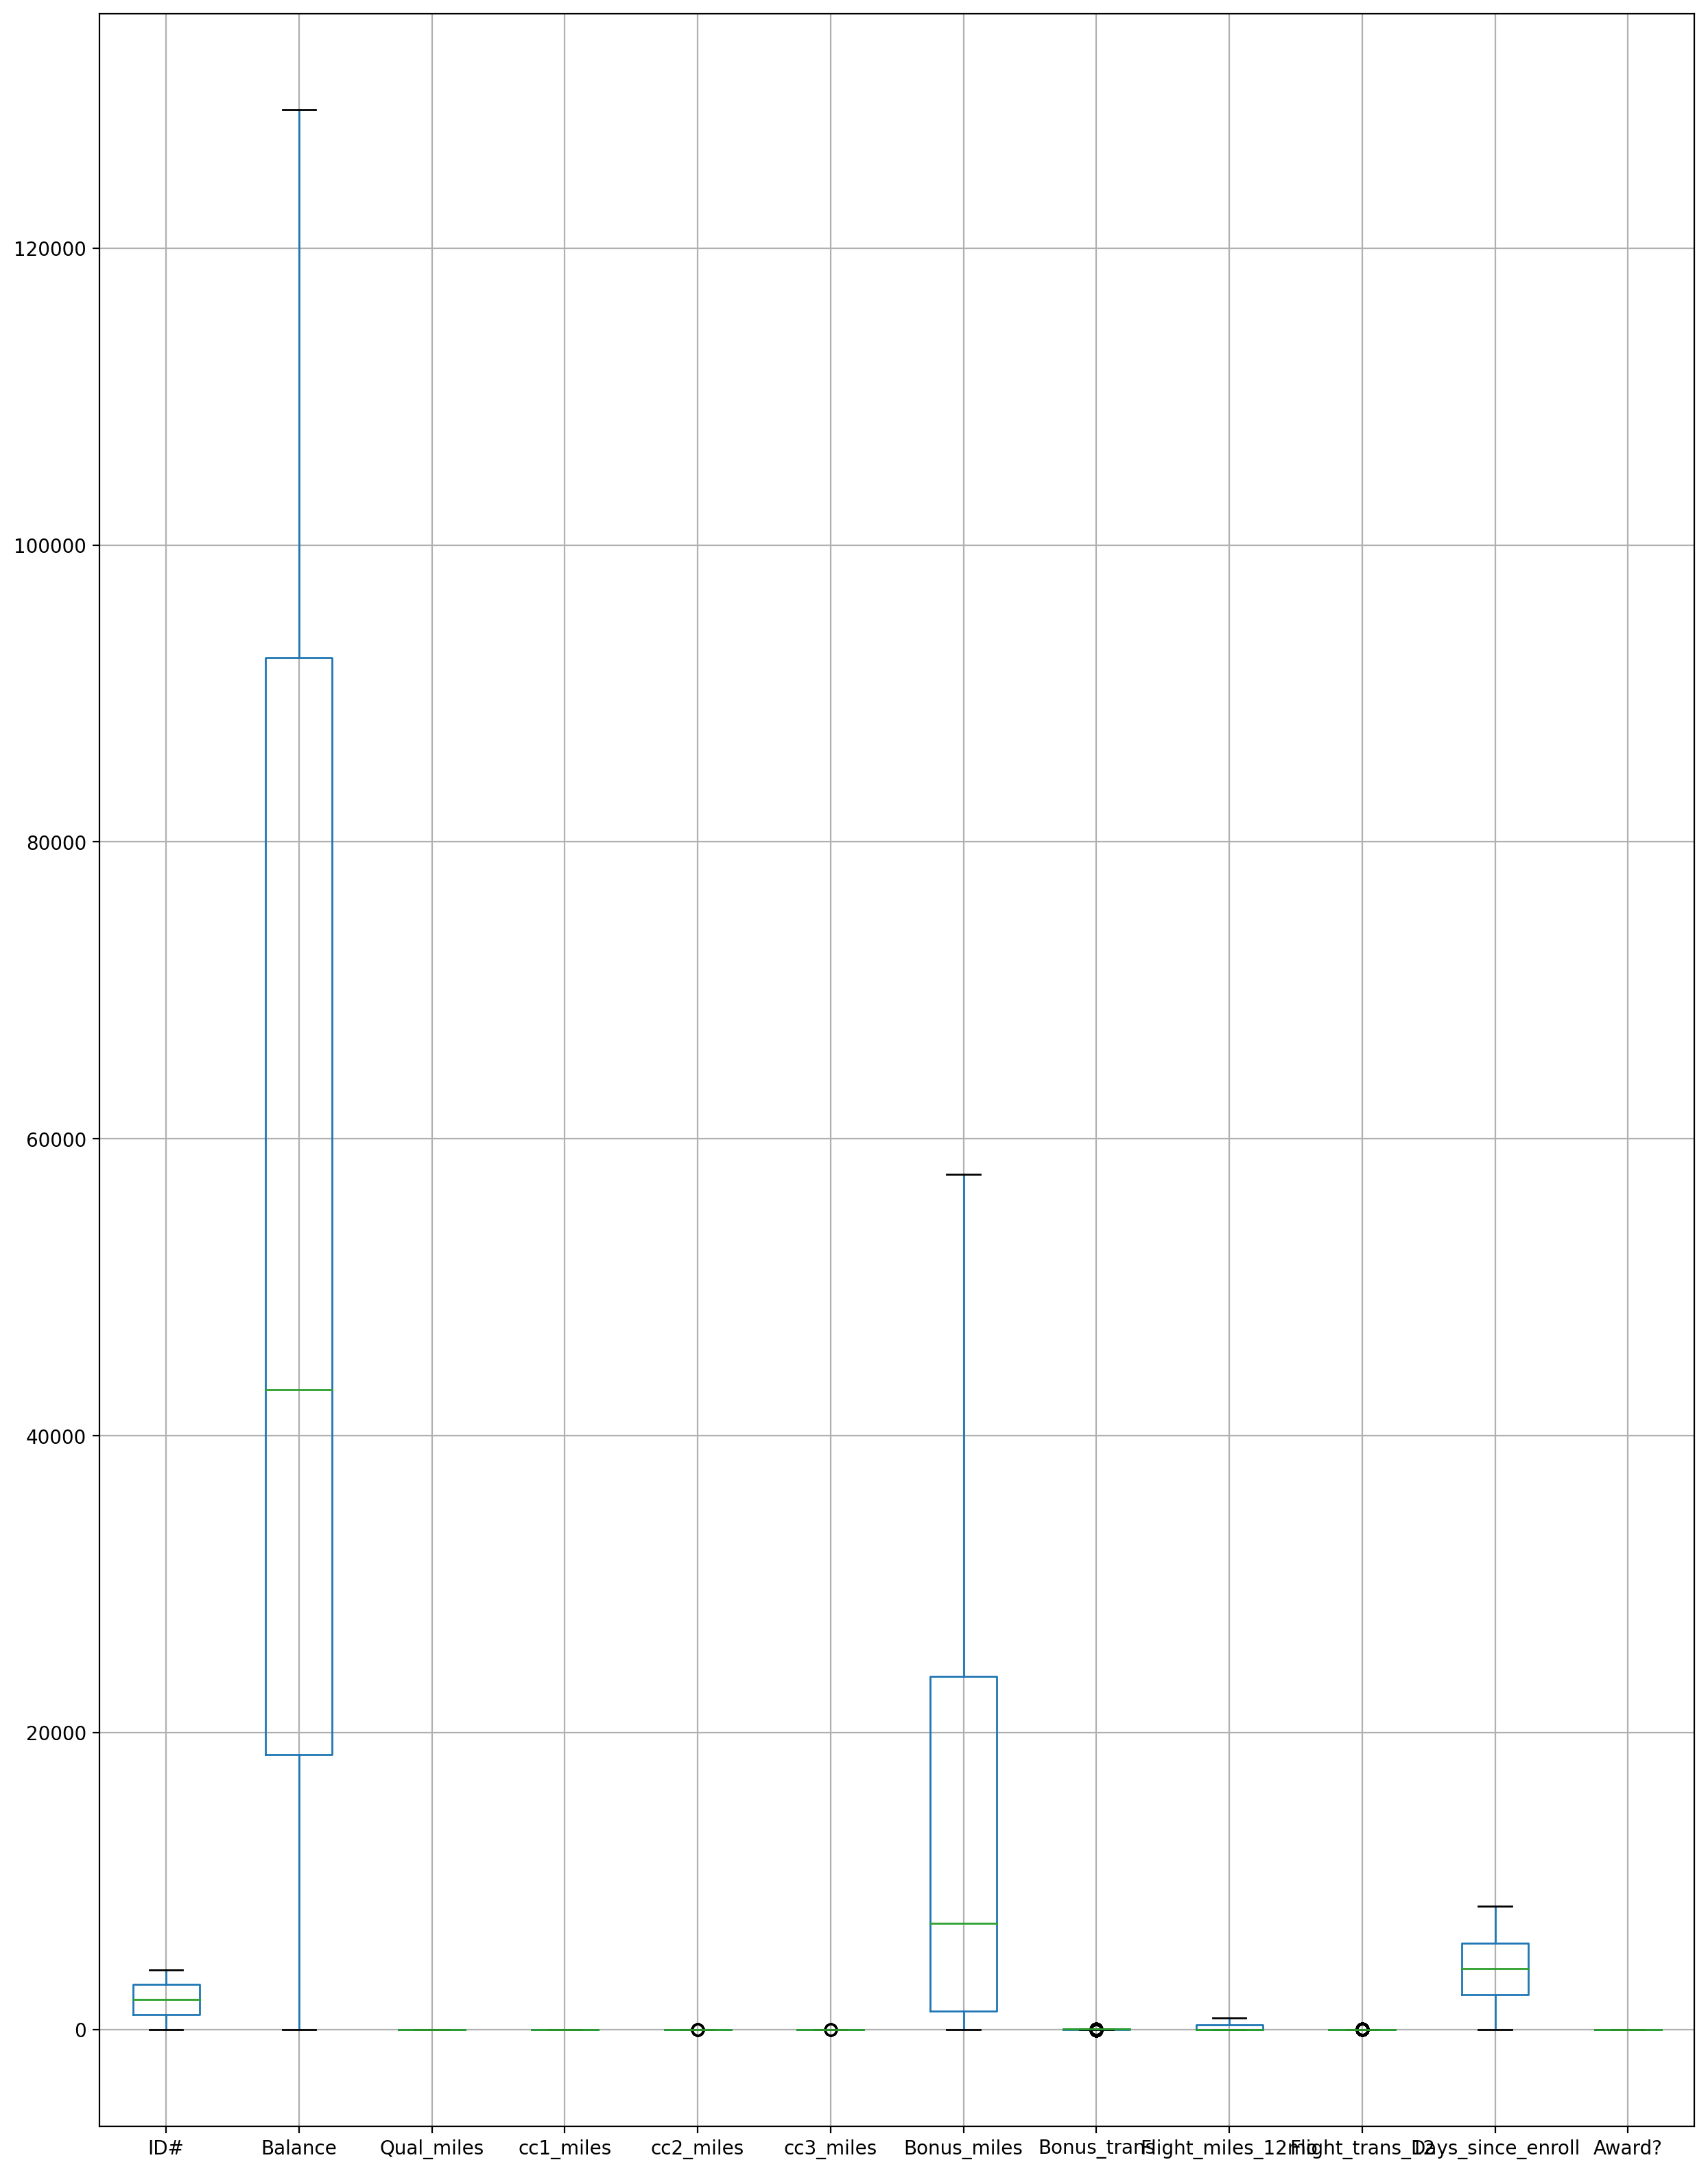

In [126]:
df.boxplot()

In [127]:
from sklearn.preprocessing import StandardScaler

In [130]:
sc=StandardScaler()

In [137]:
x=sc.fit_transform(df)

In [138]:
import scipy.cluster.hierarchy as hi

In [140]:
lk=hi.linkage(x,method='complete')


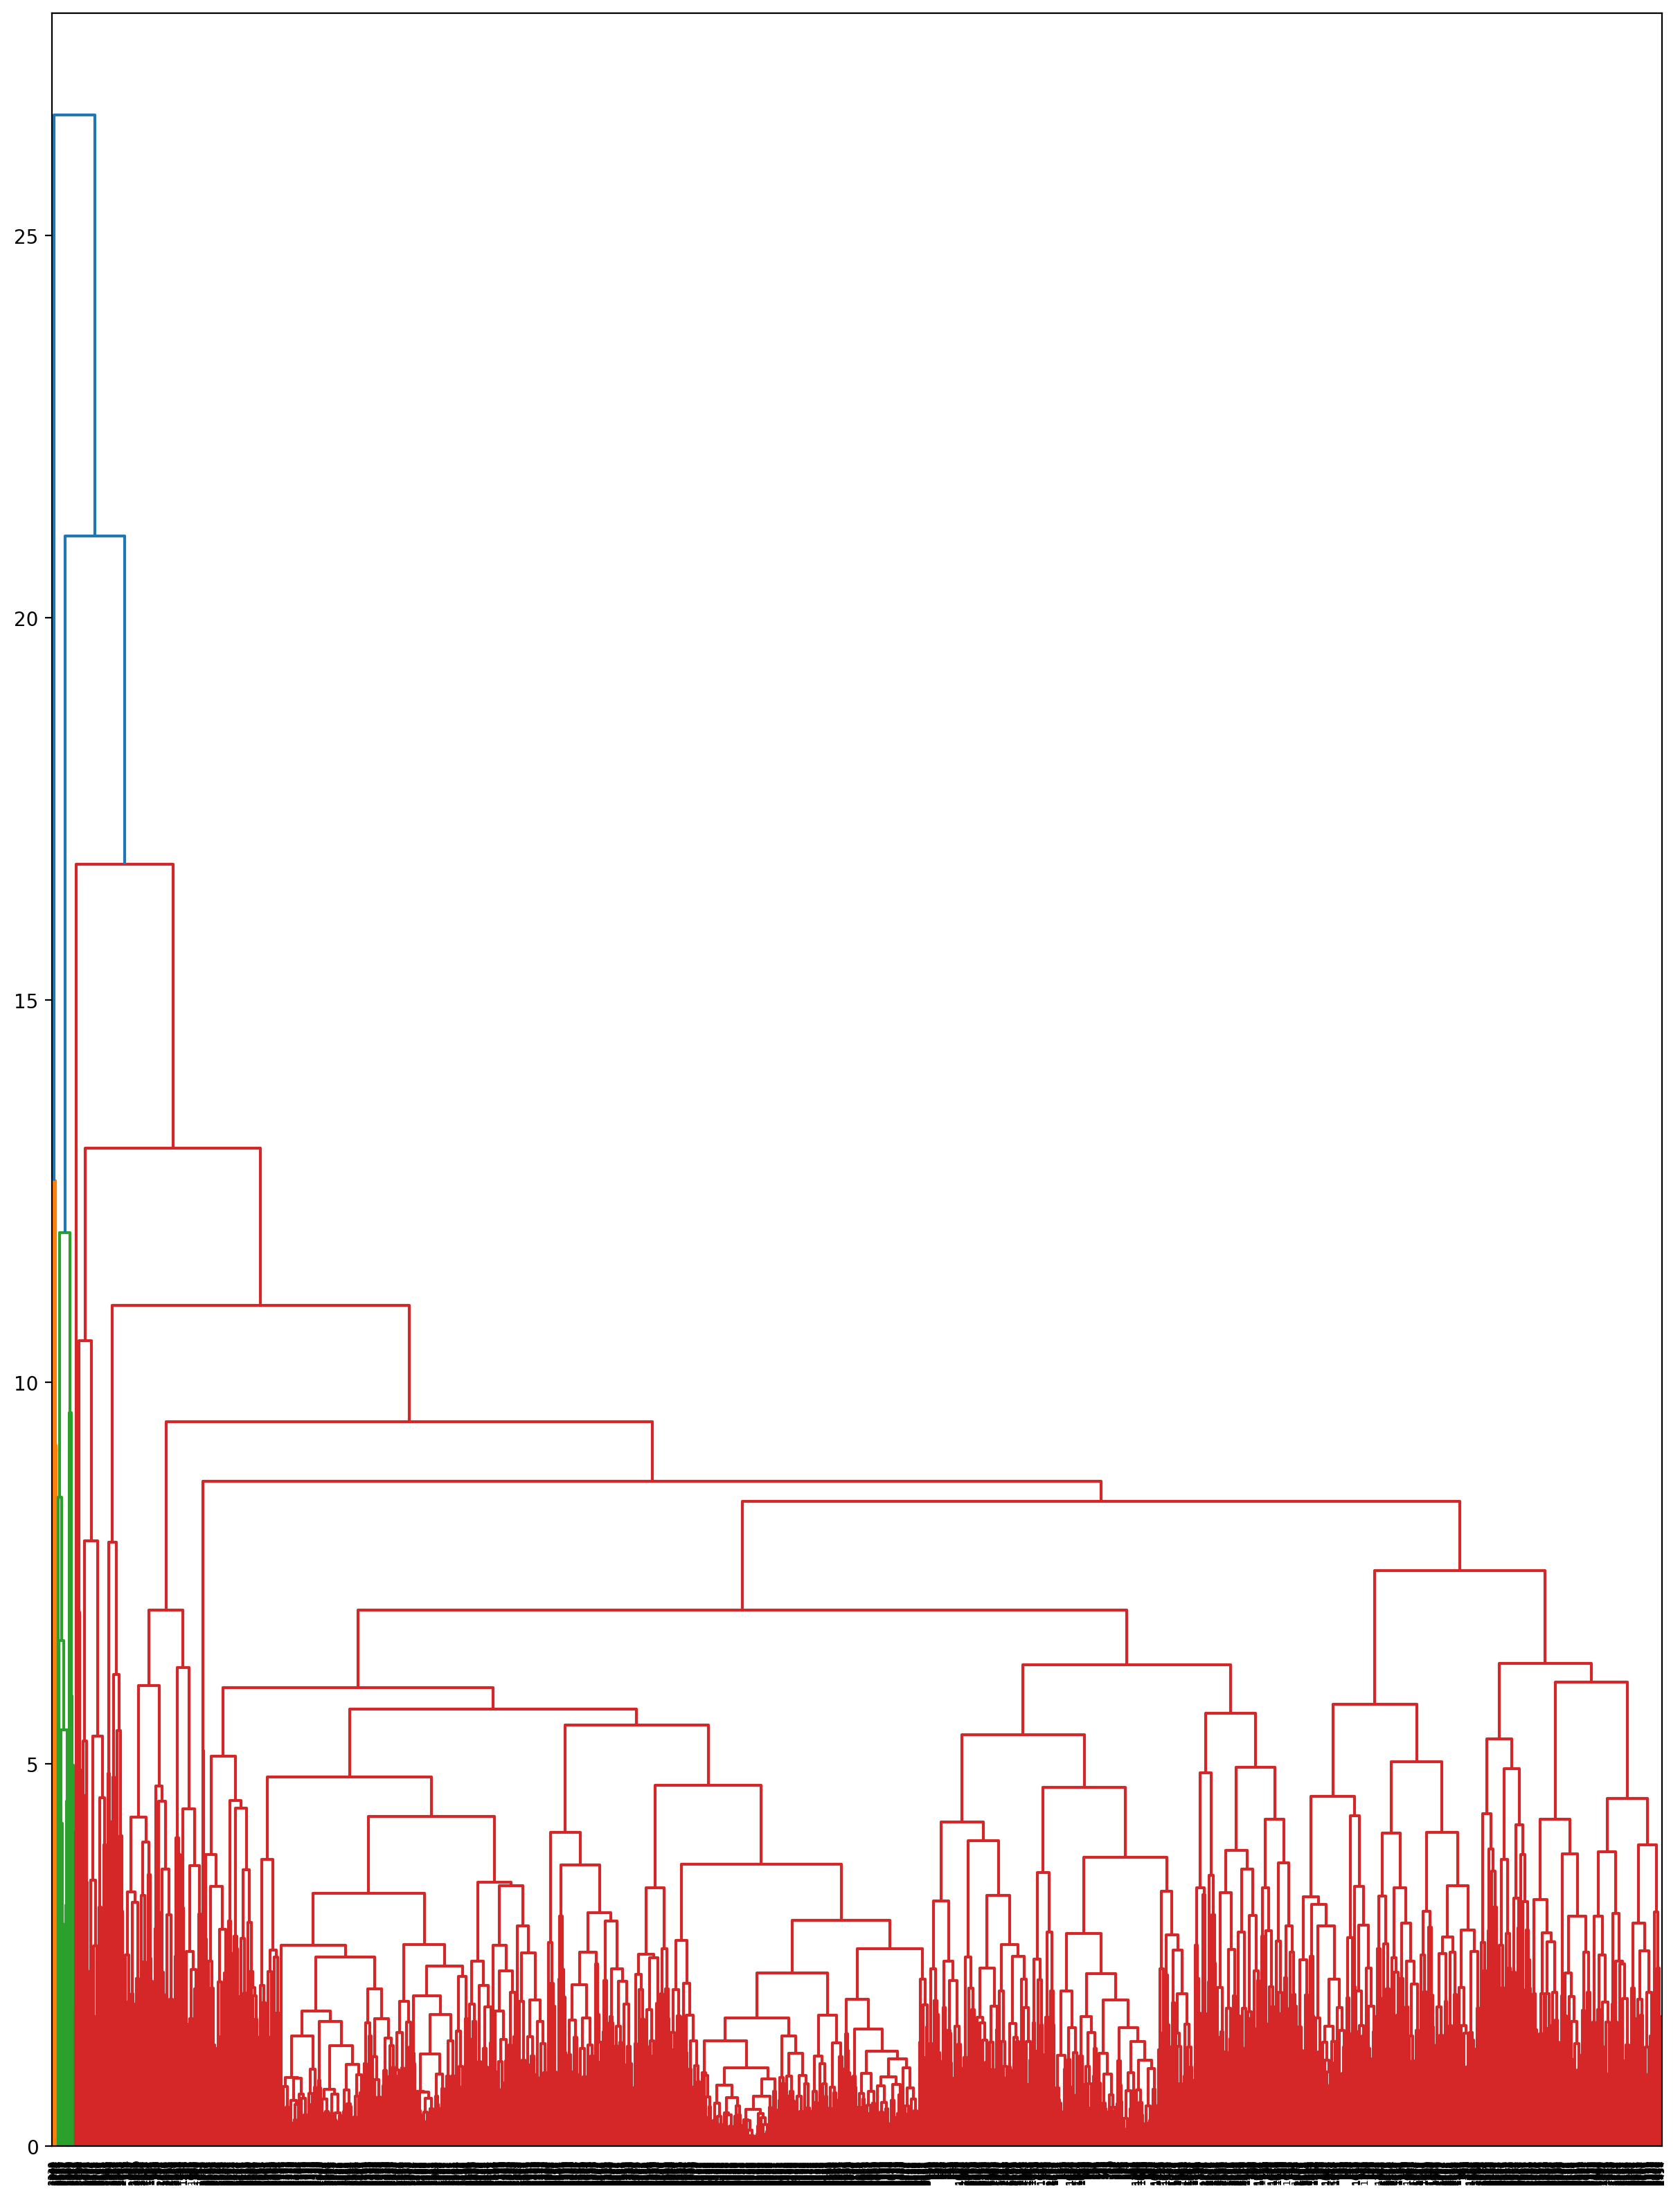

In [143]:
dendro=hi.dendrogram(lk)
plt.show()

In [145]:
from sklearn.cluster import AgglomerativeClustering

In [150]:
ag=AgglomerativeClustering(n_clusters=3)

In [152]:
y=ag.fit_predict(x)

In [156]:
lk=hi.linkage(x,method='complete')


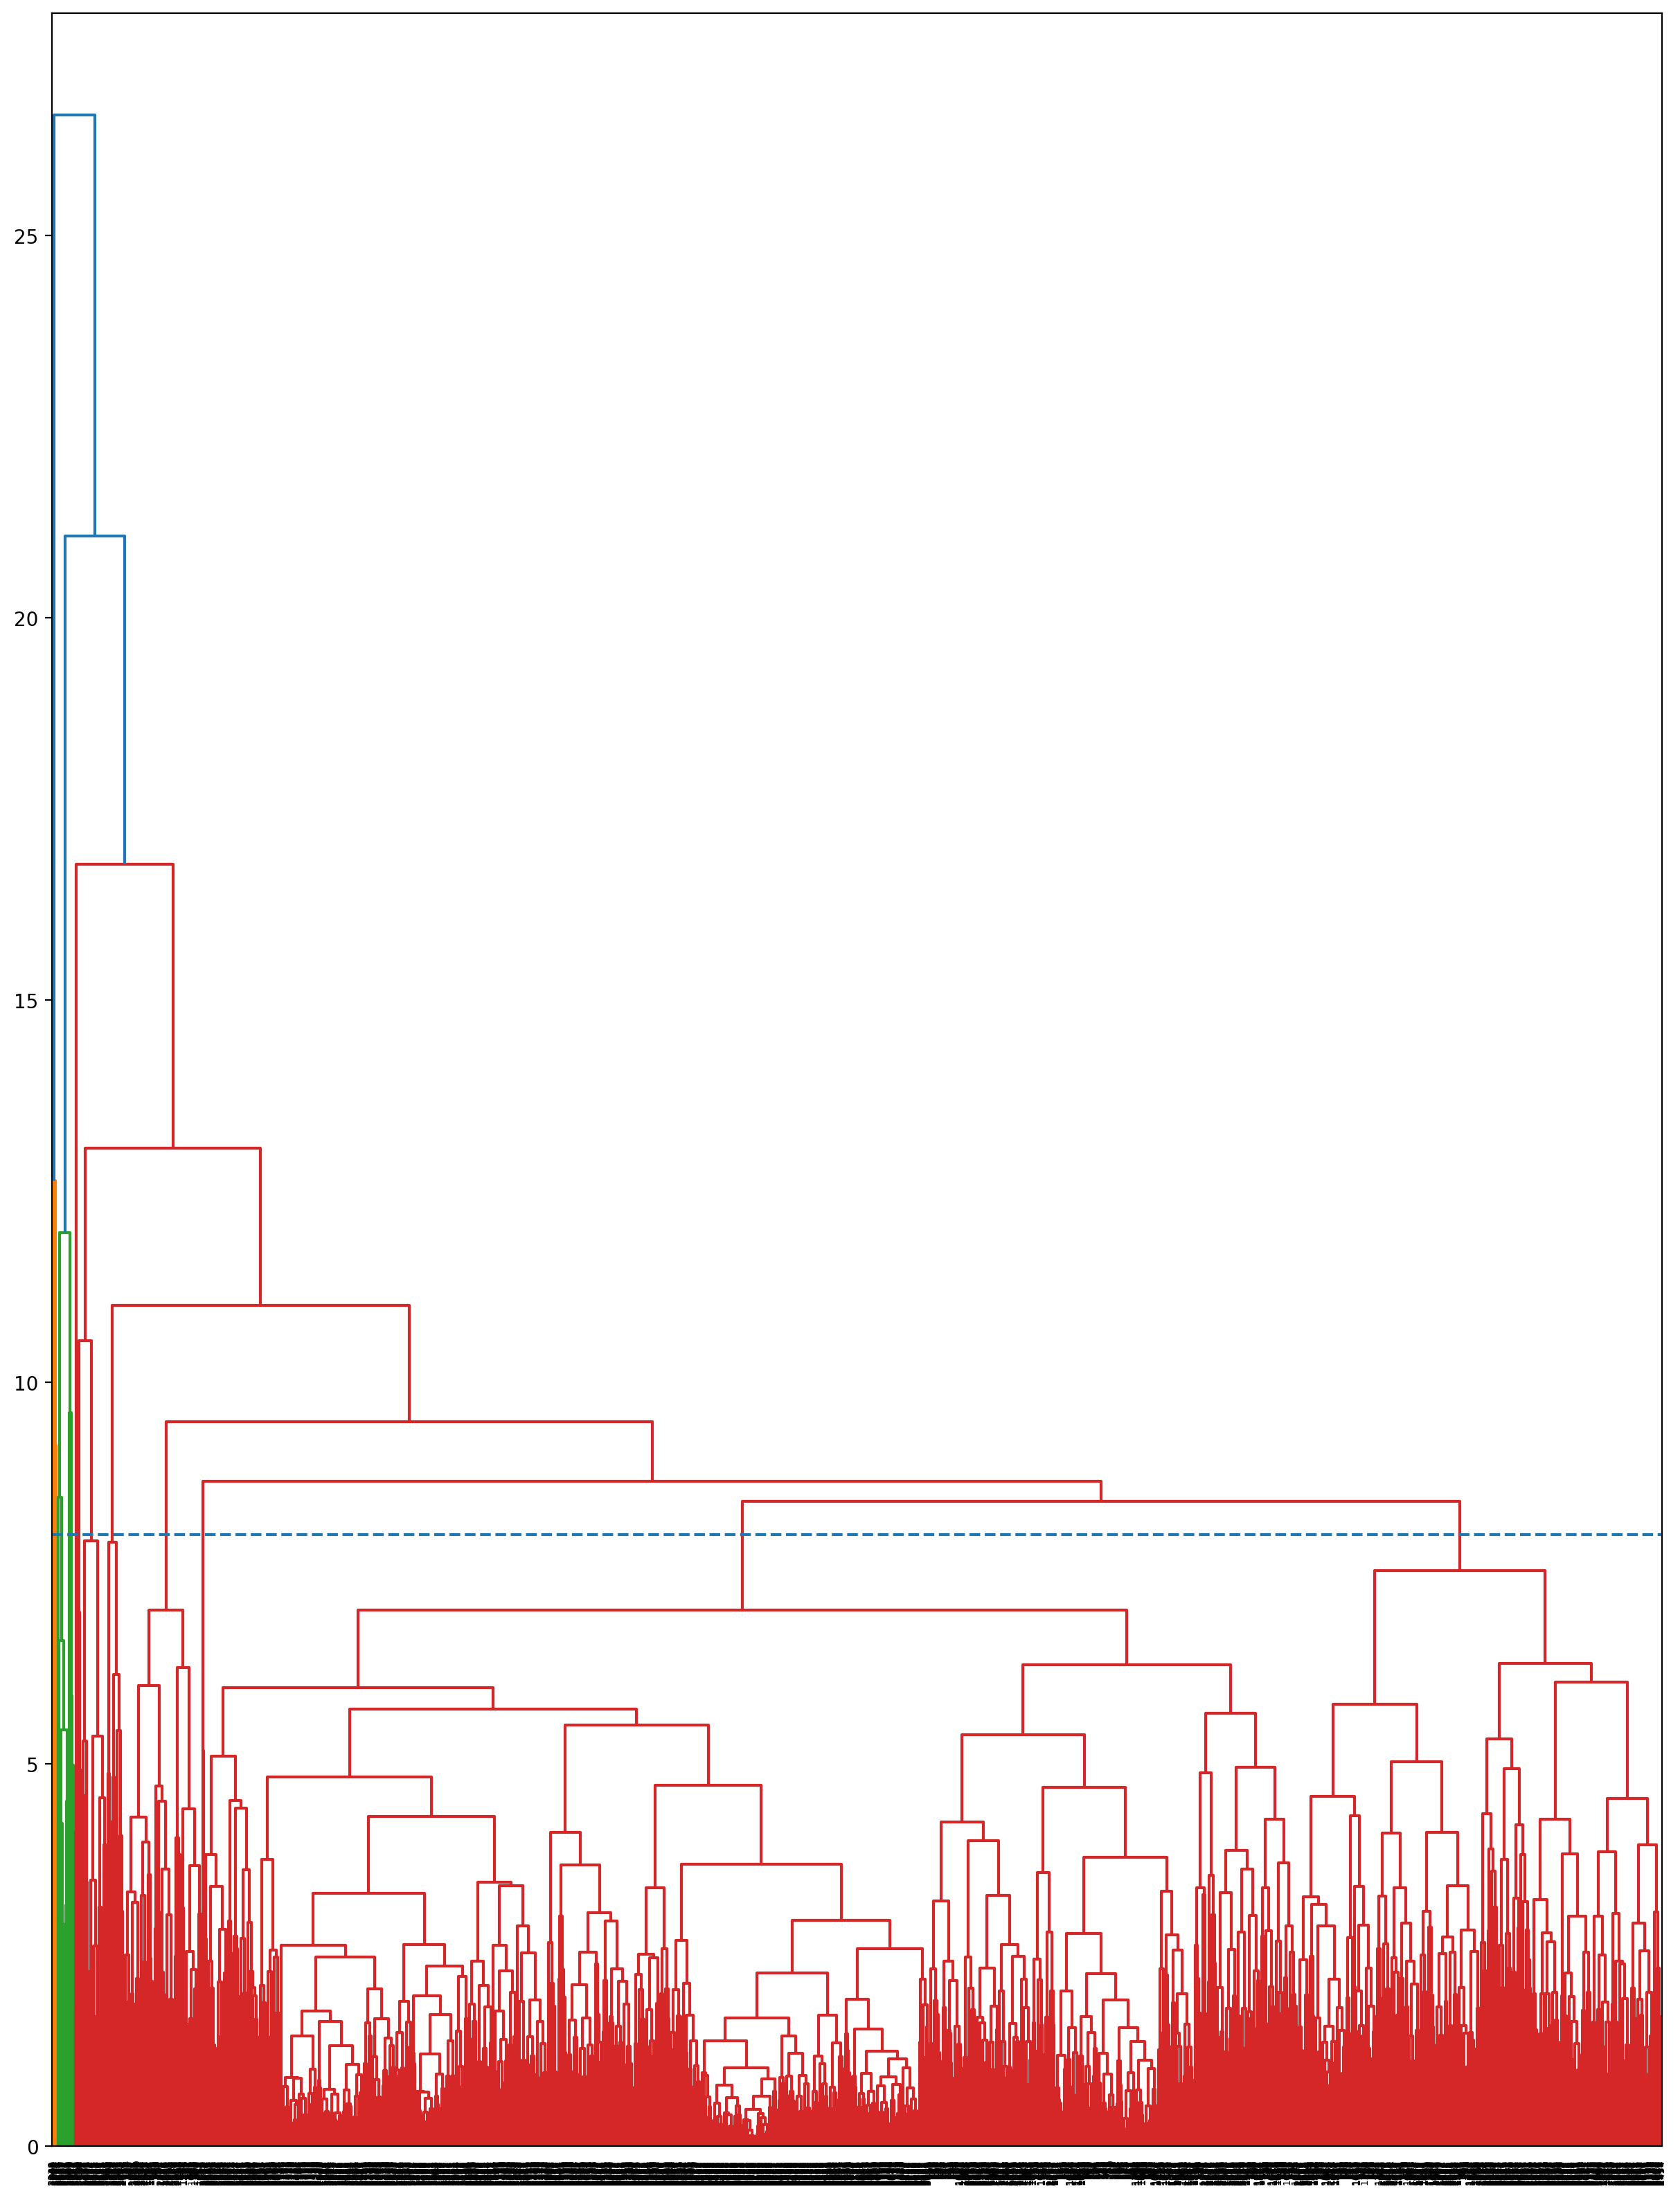

In [157]:

dendro=hi.dendrogram(lk)
plt.axhline(y=8,linestyle='--')
plt.show()

In [158]:
ag=AgglomerativeClustering(n_clusters=5)

In [160]:
y=ag.fit_predict(x)

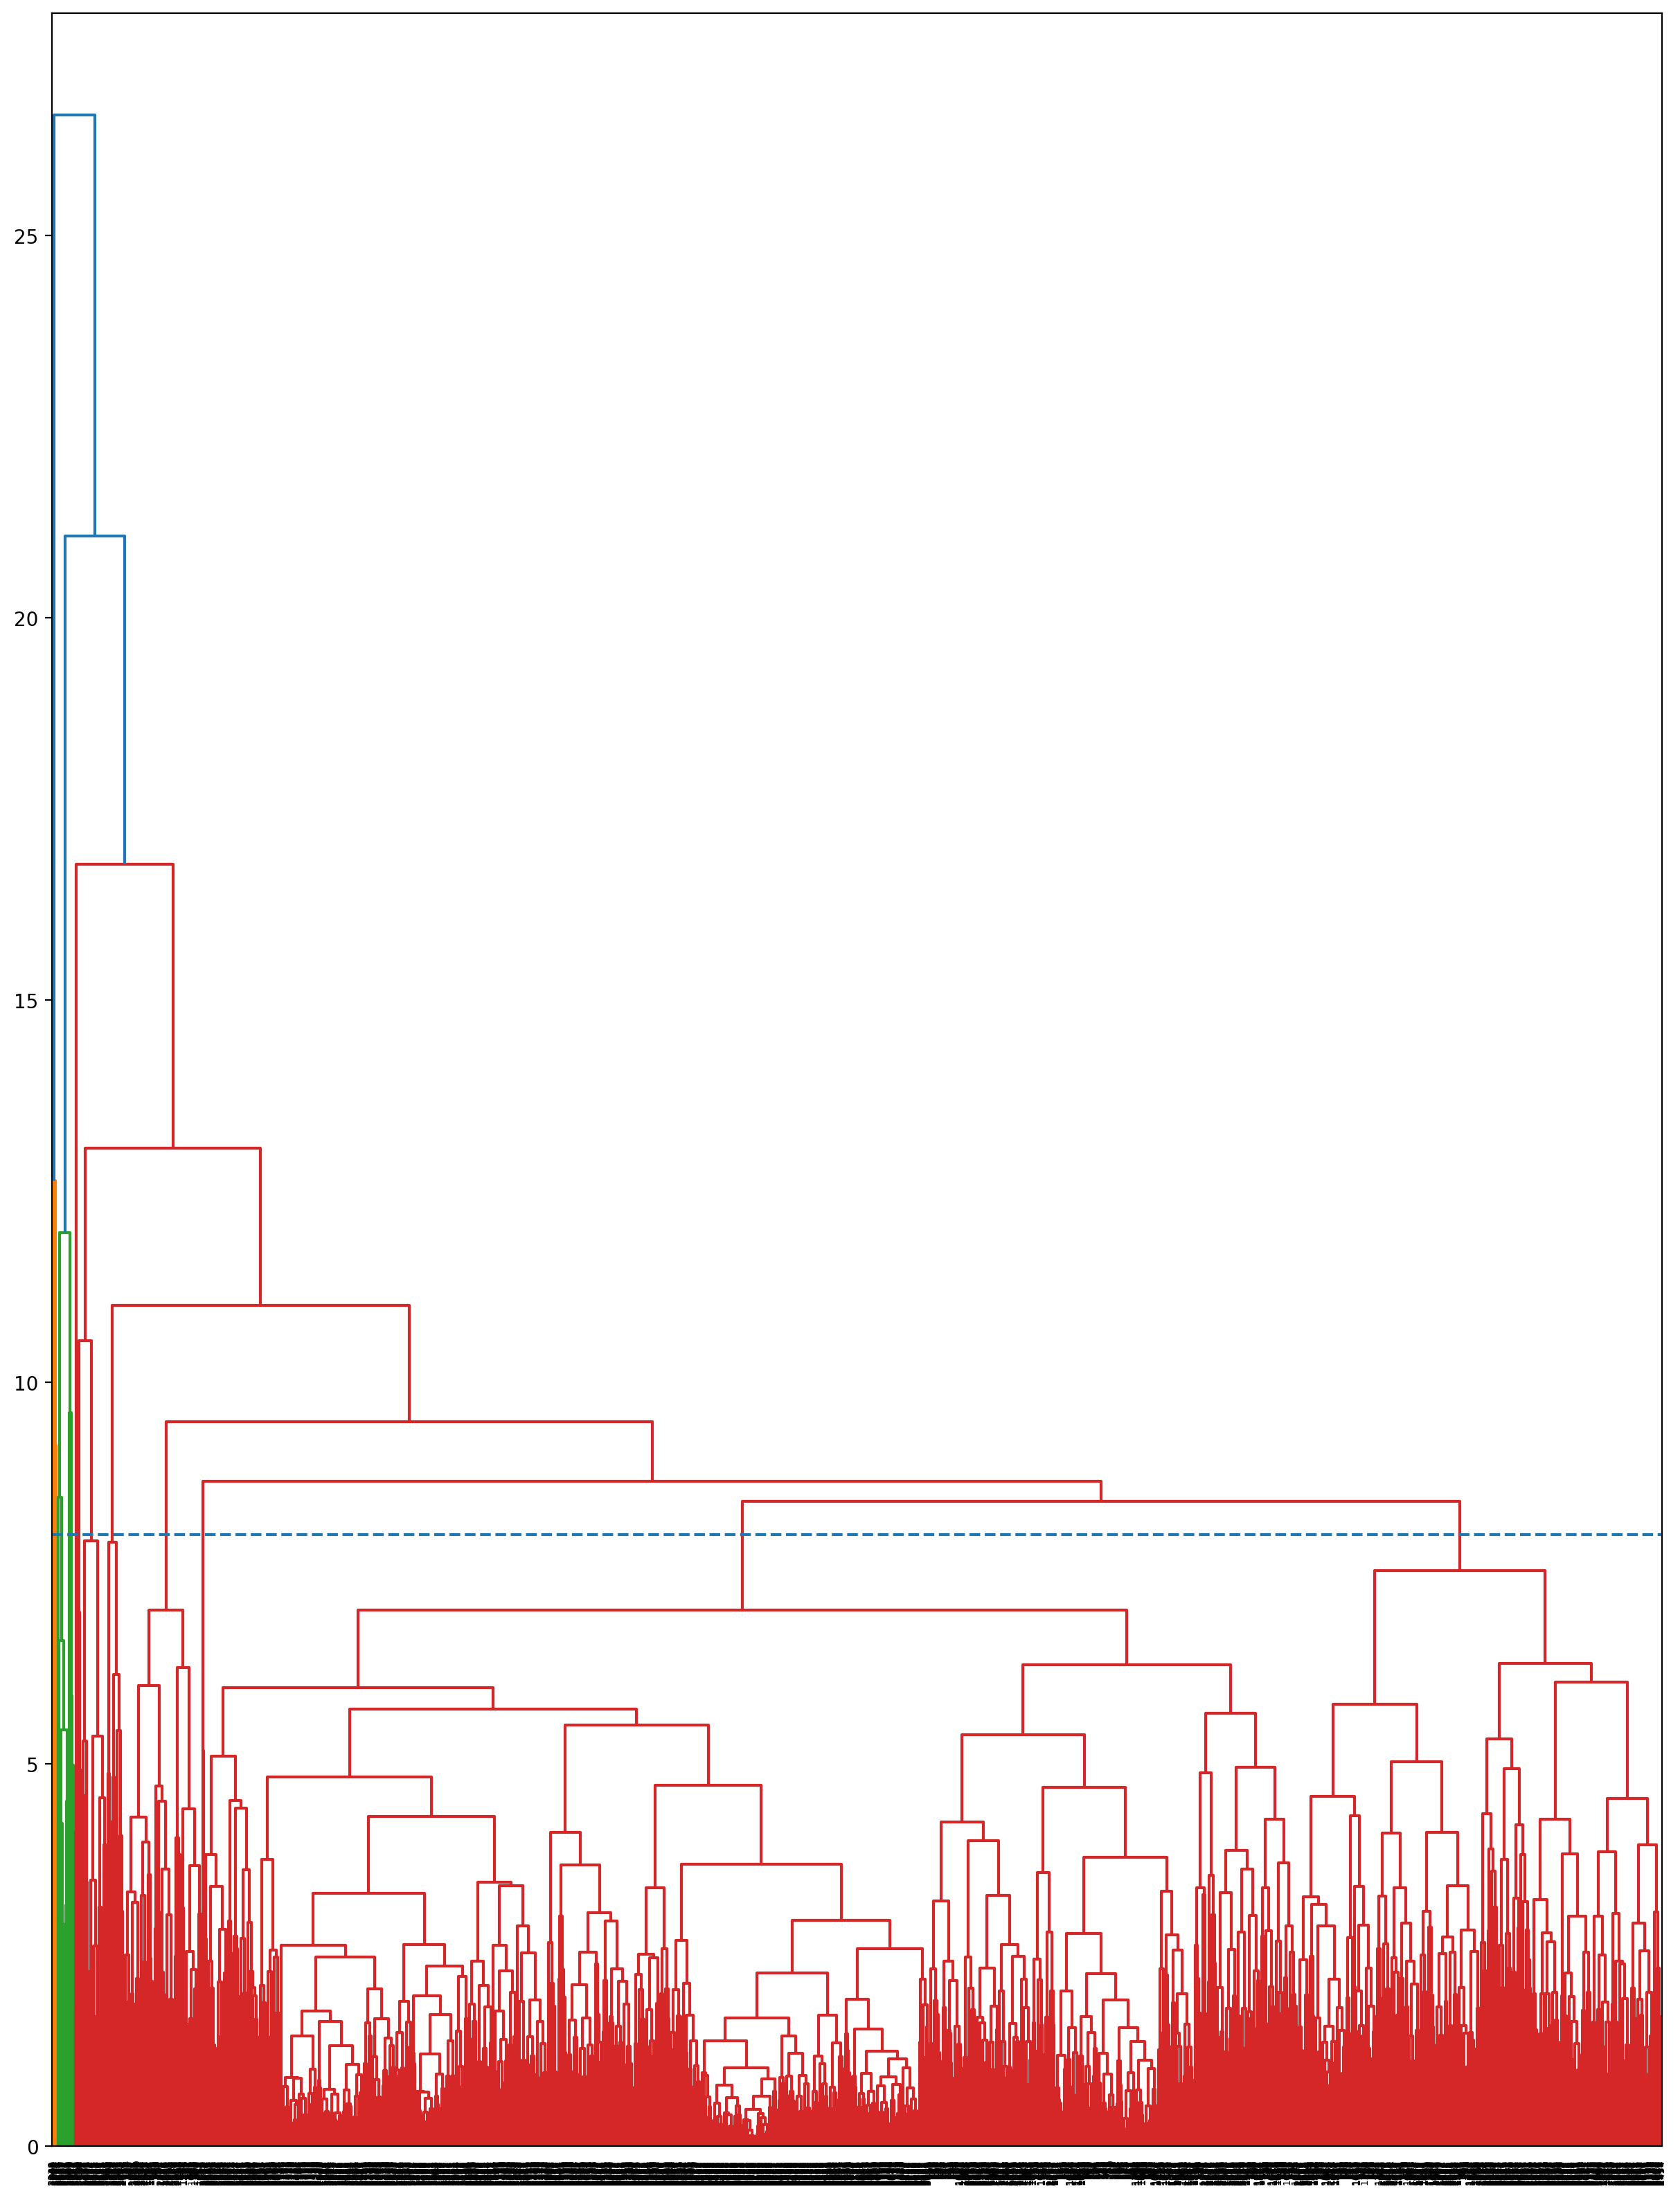

In [161]:
dendro=hi.dendrogram(lk)
plt.axhline(y=8,linestyle='--')
plt.show()

# kmeans

In [163]:
from sklearn.cluster import KMeans

In [181]:
K=KMeans()

In [182]:
y=K.fit_predict(x)

In [183]:
K.cluster_centers_

array([[-0.04544301,  0.46817387,  0.        , -0.48528666, -0.09824189,
        -0.06276658, -0.24652772,  0.30881778,  1.88137442,  1.36327555,
         0.06265041,  0.56019804],
       [-0.84490134, -0.28958971,  0.        , -0.50937264, -0.09824189,
        -0.05785995, -0.56117163, -0.27110994, -0.45829686, -0.31342529,
         0.82022344, -0.27896335],
       [ 0.56098046,  0.30560831,  0.        ,  0.86876967, -0.09824189,
        -0.0464007 ,  0.605926  ,  0.57641002, -0.35545932, -0.28761735,
        -0.53893888,  0.20564654],
       [-0.30152248,  0.85024243,  0.        ,  1.0220844 , -0.09824189,
        15.64629931,  2.21745349,  0.68230458,  0.40991451,  0.05969539,
         0.23987261,  0.33752735],
       [ 0.97895256, -0.65301043,  0.        , -0.72141197, -0.09824189,
        -0.06276658, -0.69820191, -0.48607224, -0.40623203, -0.29596033,
        -0.98317981, -0.5032583 ],
       [ 0.21932485, -0.16876463,  0.        , -0.66822727,  9.03825361,
        -0.06276658, -

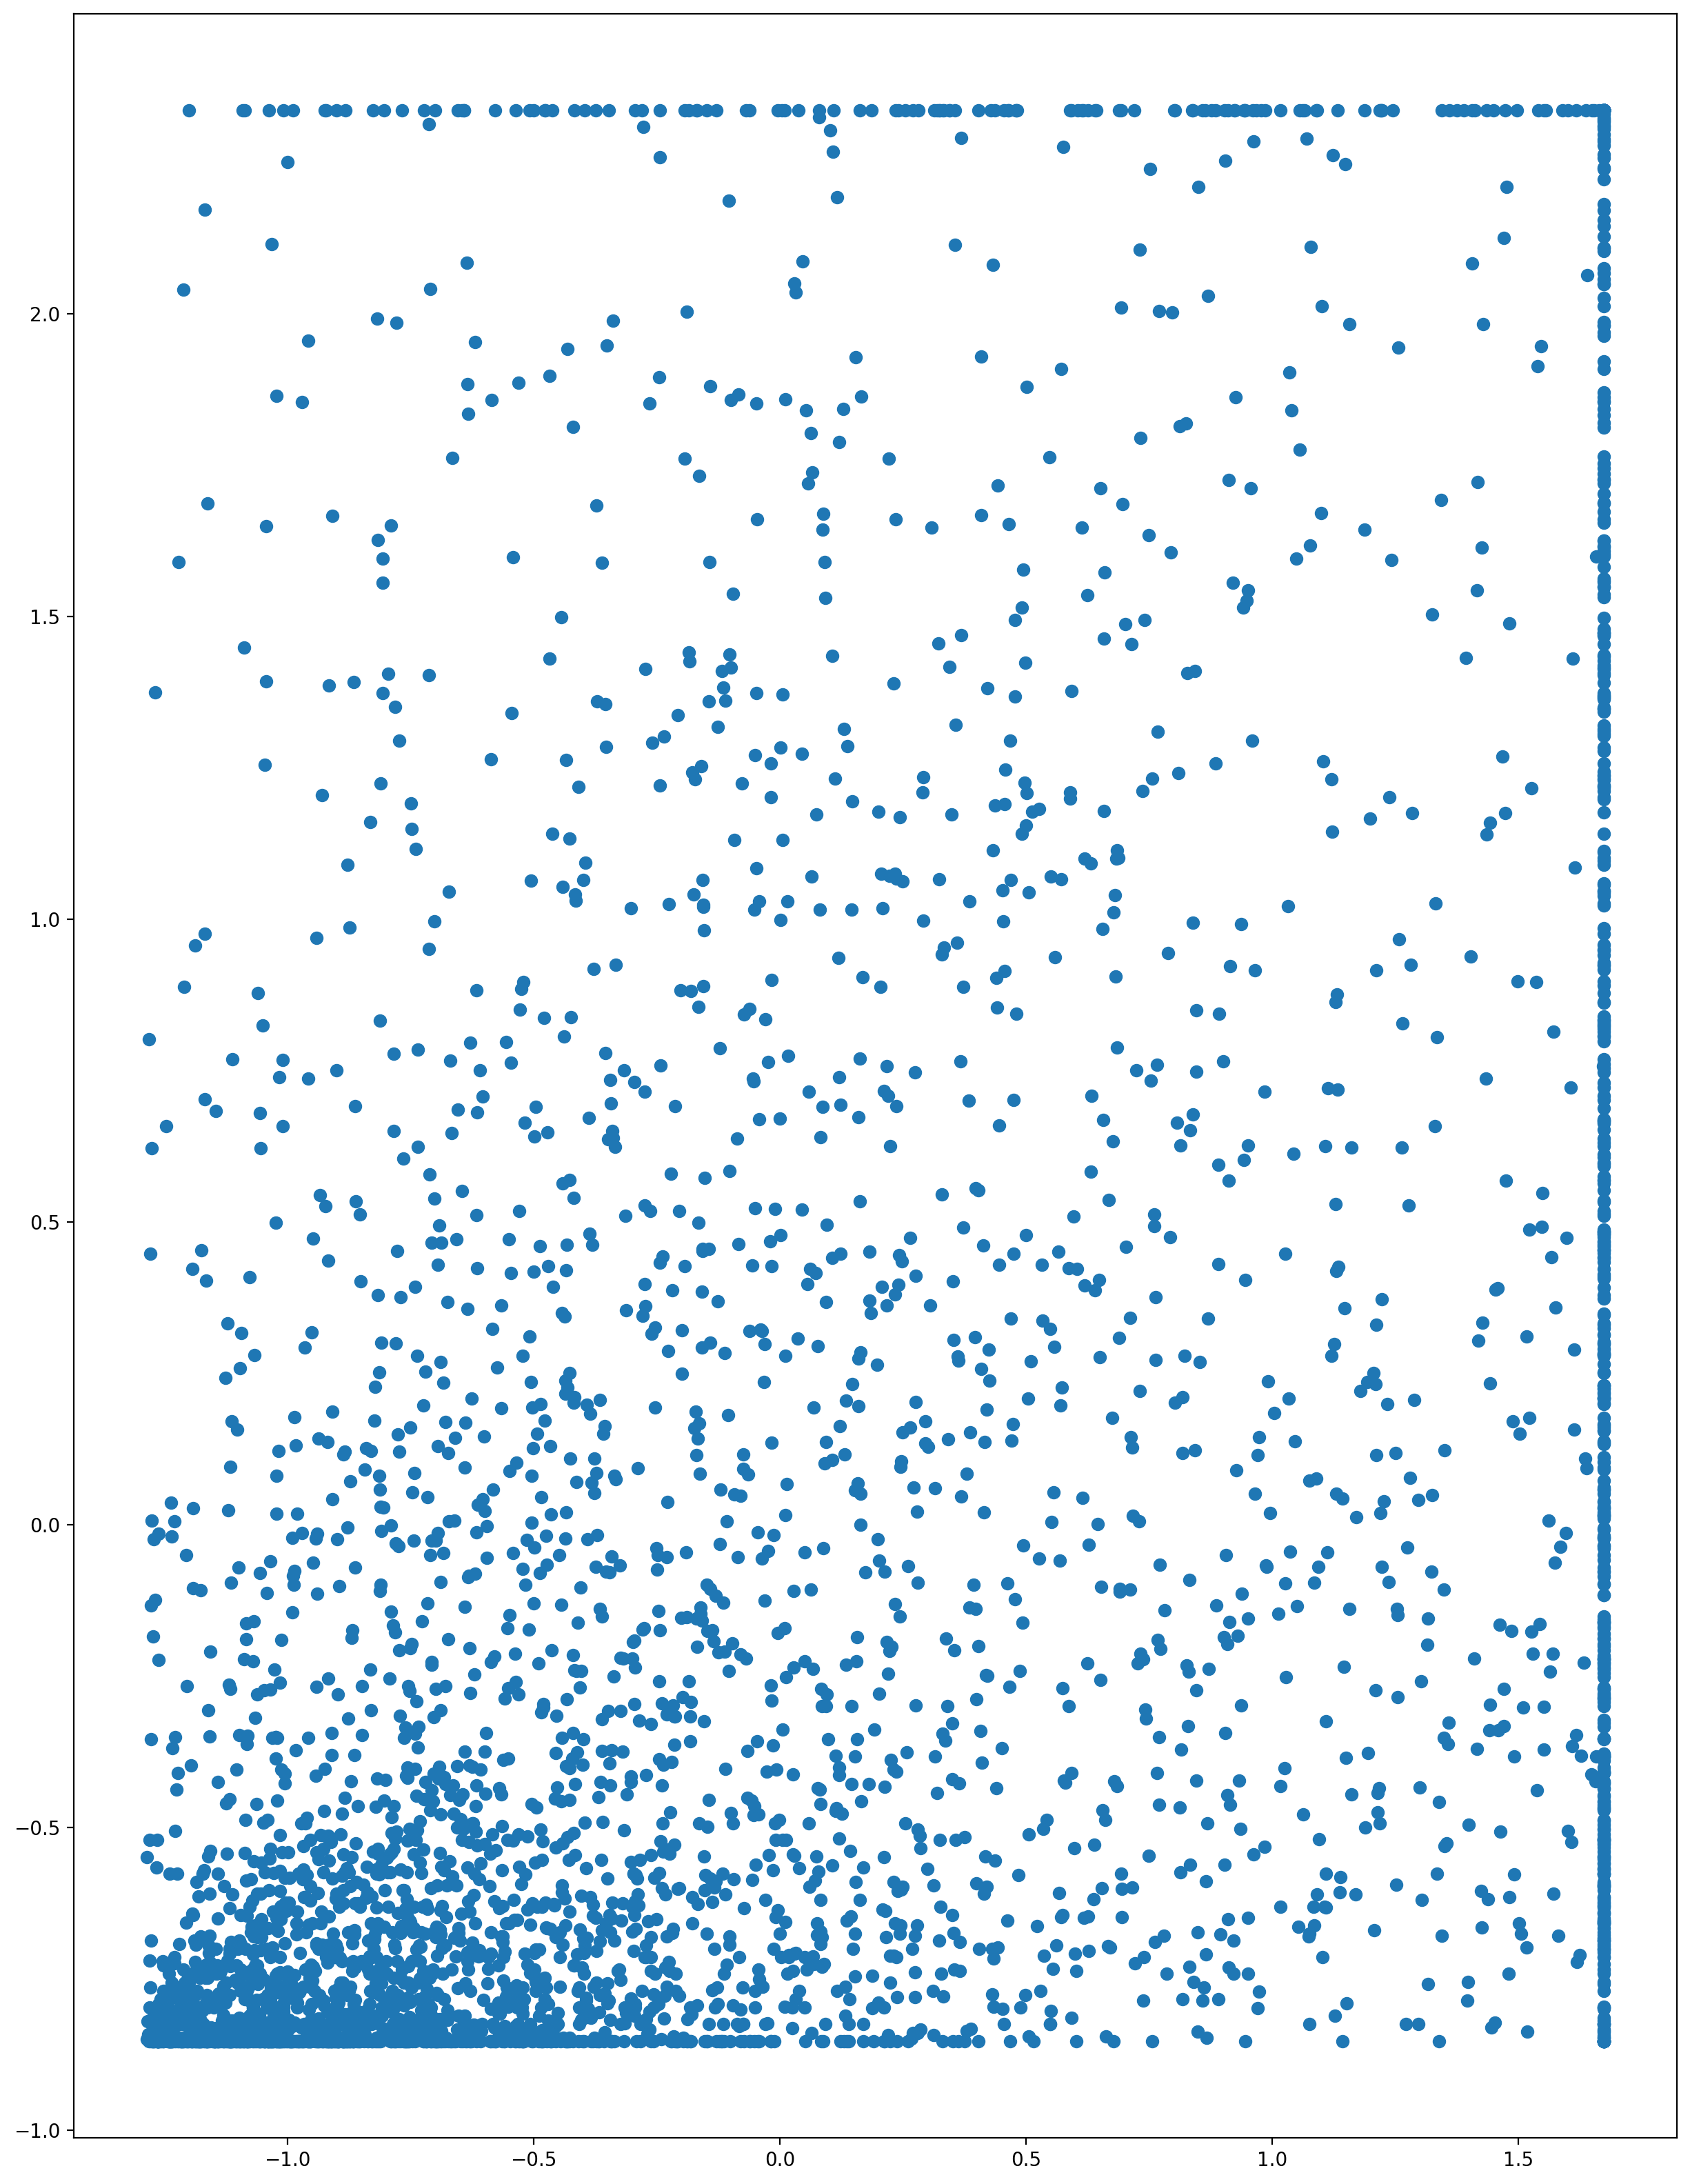

In [184]:
plt.scatter(x[:,1],x[:,6],cmap='rainbow')
plt.show()

In [186]:
from sklearn.metrics import silhouette_score

In [187]:
sh=silhouette_score(x,y)

In [189]:
sh

0.24554856412406975

In [196]:
wcss=[]

for i in range (1,11):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

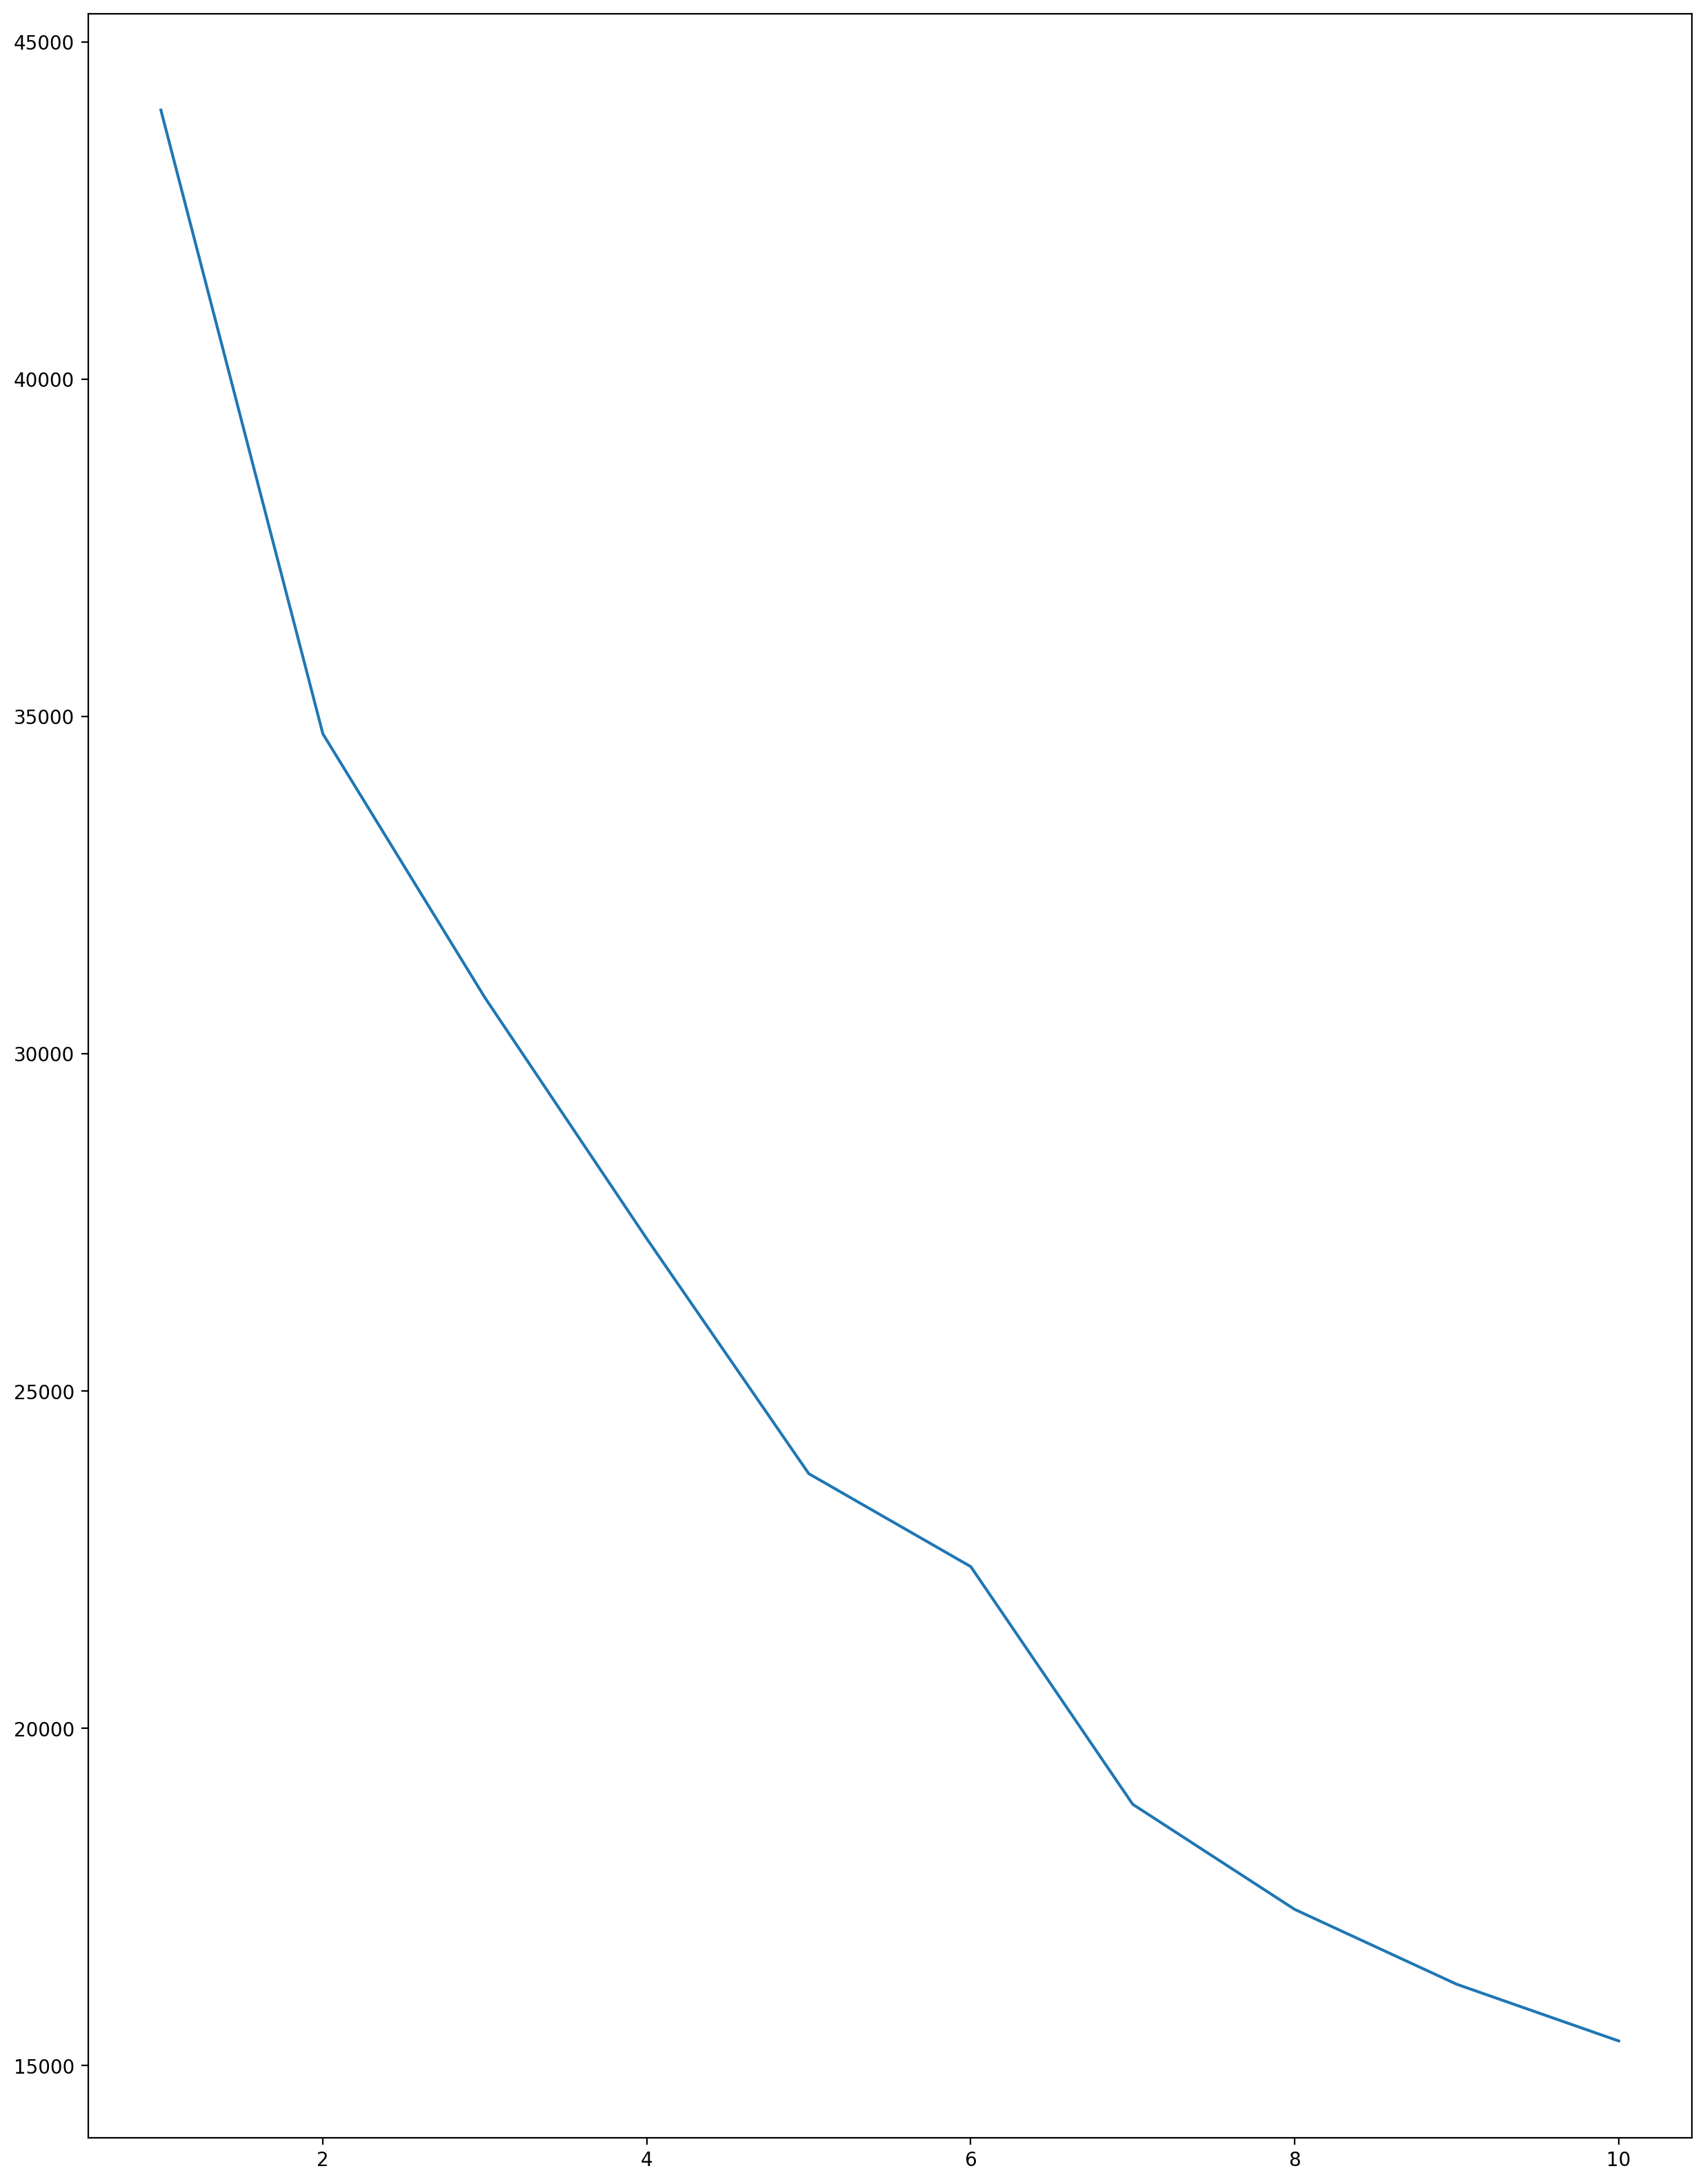

In [197]:
plt.plot(range(1,11),wcss)
plt.show()

In [210]:
km=KMeans(n_clusters=2)
y=km.fit_predict(x)

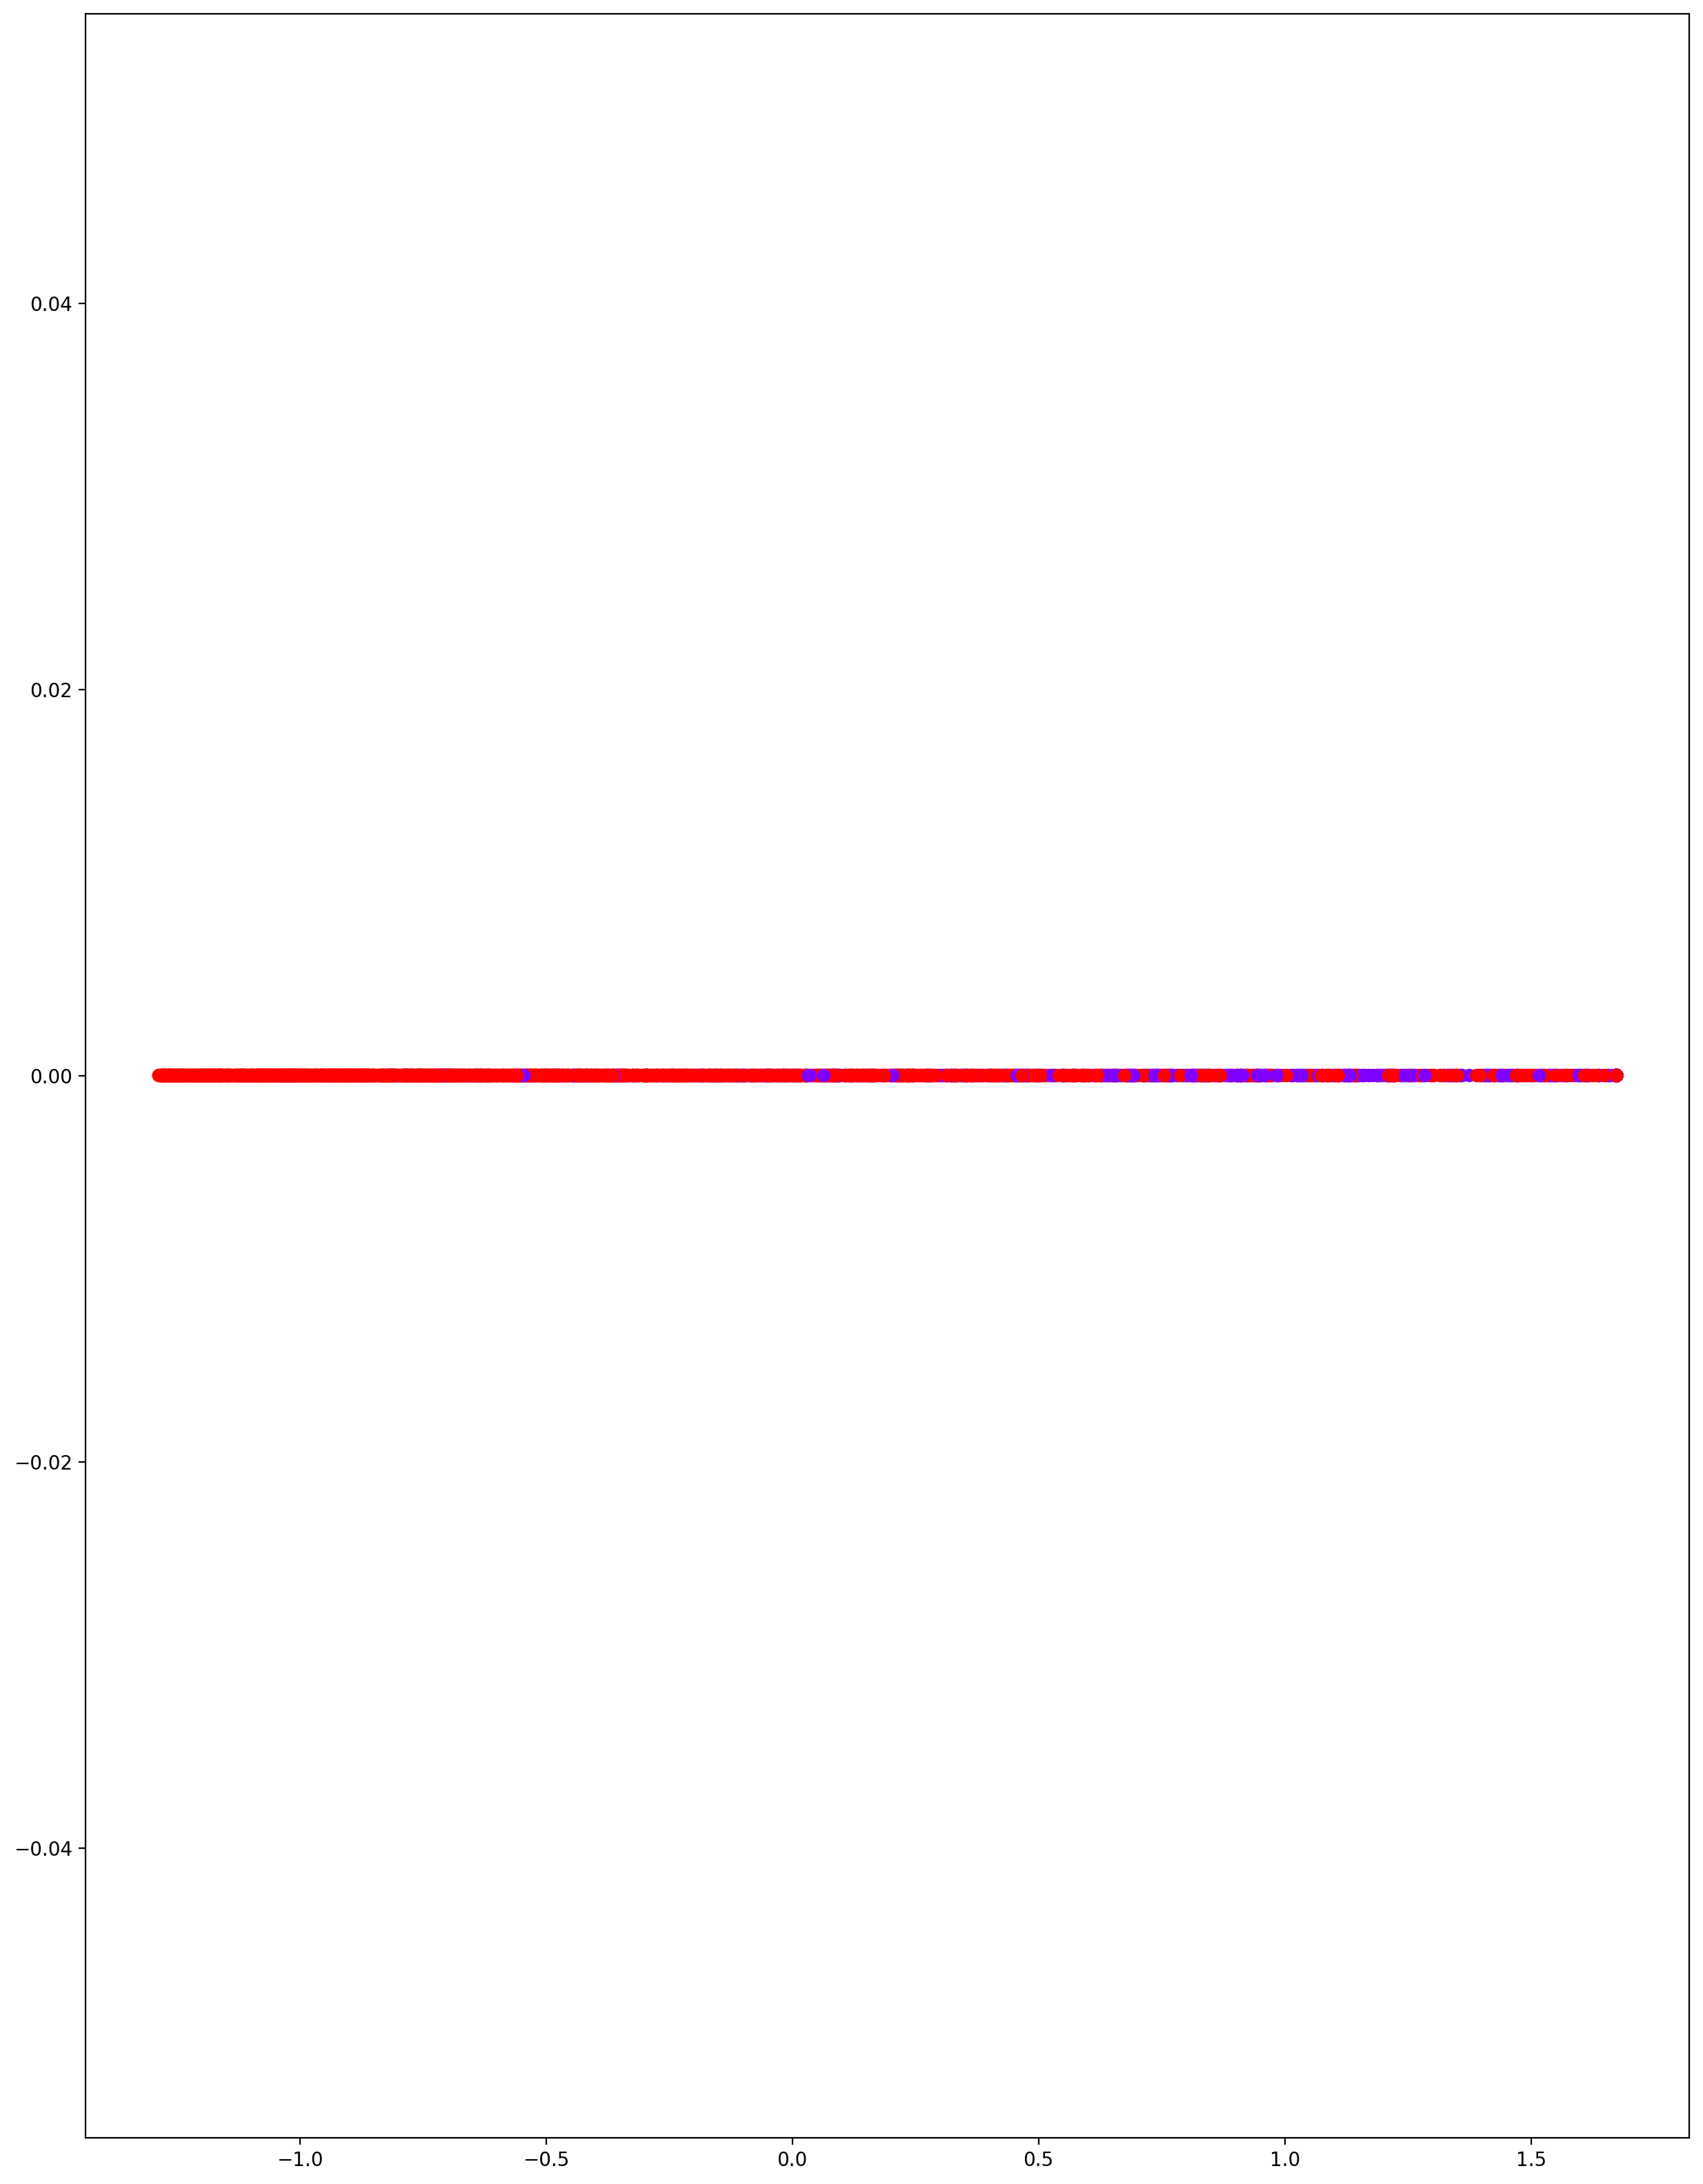

In [211]:
plt.scatter(x[:,1],x[:,2],c=y,cmap='rainbow')
plt.show()

In [212]:
sh=silhouette_score(x,y)

In [213]:
sh

0.2754851872837117

# Dbscan

In [221]:
from sklearn.cluster import DBSCAN

In [222]:
ds=DBSCAN(eps=0.5,min_samples=5)

In [224]:
y=ds.fit_predict(x)

In [226]:
y

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

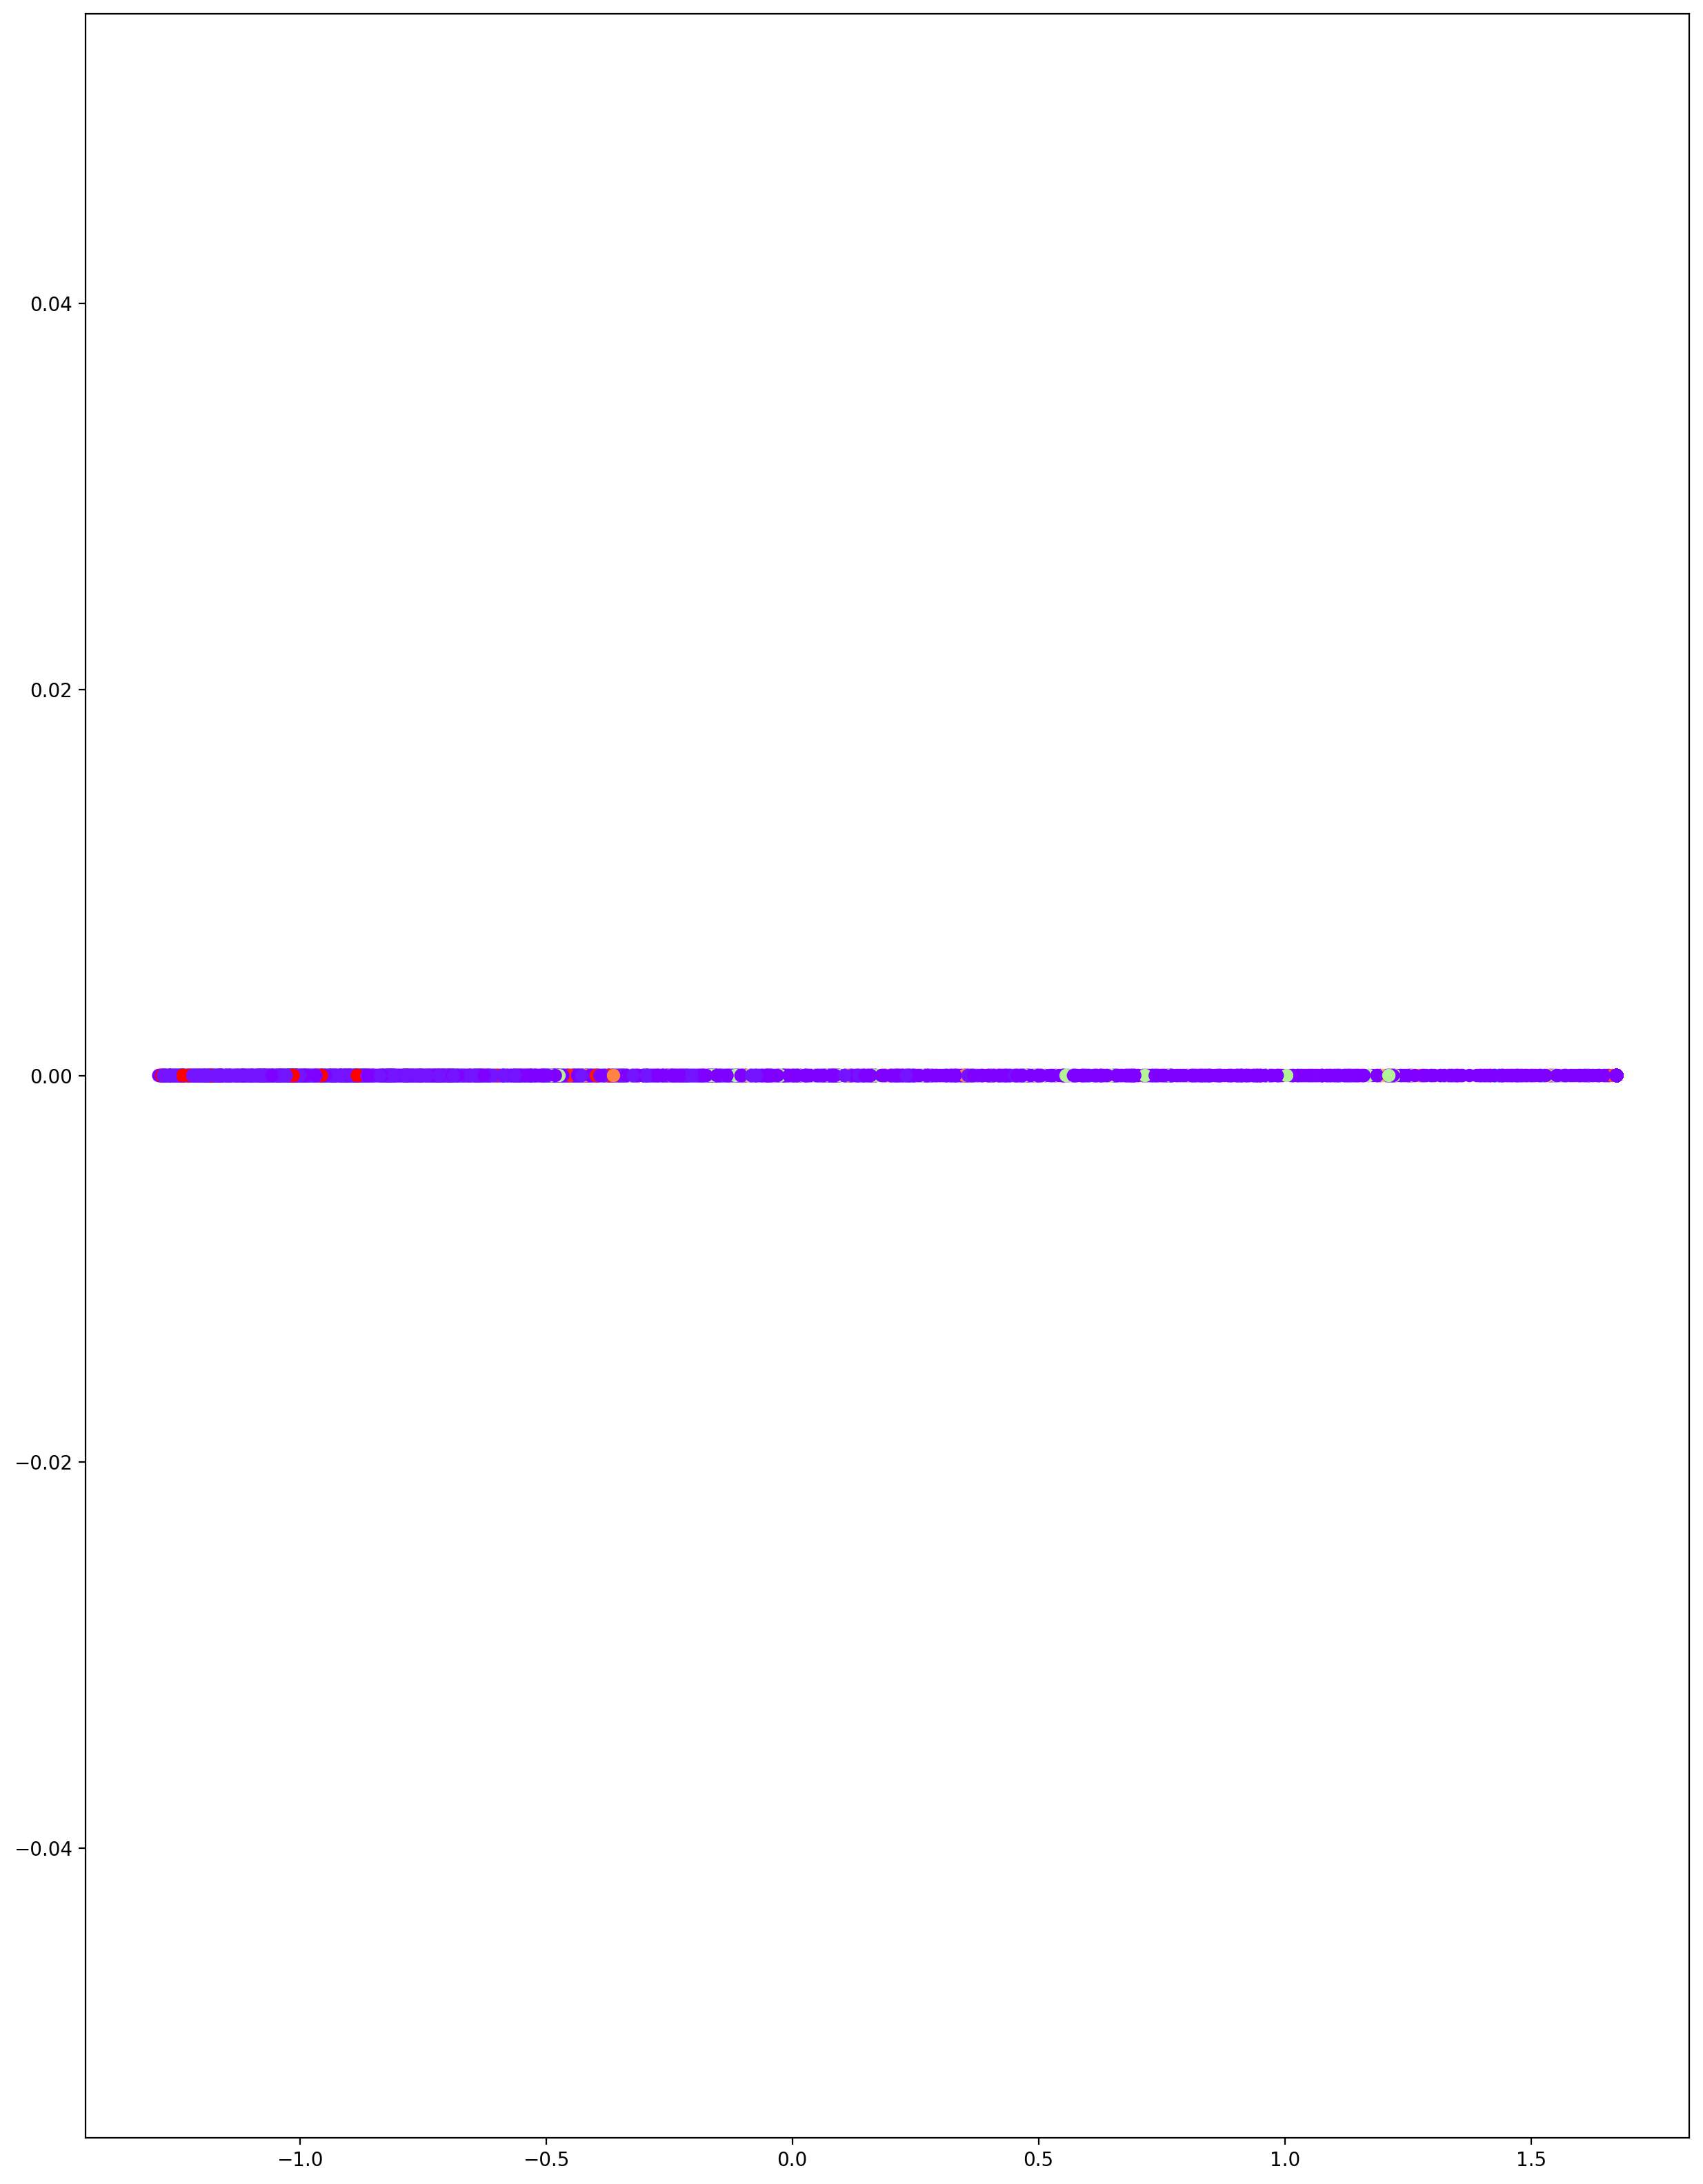

In [229]:
plt.scatter(x[:,1],x[:,2],c=y,cmap='rainbow')
plt.show()

In [231]:
sh=silhouette_score(x,y)

In [232]:
sh

-0.34874232436529956

In [234]:
from sklearn.neighbors import NearestNeighbors

In [235]:
nb=NearestNeighbors(n_neighbors=3).fit(x)

In [237]:
d,i=nb.kneighbors(x)

In [239]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.225594,0.229960
1,0.0,0.141189,0.197486
2,0.0,0.209266,0.366256
3,0.0,0.106647,0.121314
4,0.0,0.635406,0.724455
...,...,...,...
3994,0.0,0.554122,0.640311
3995,0.0,0.251491,0.423047
3996,0.0,0.300773,0.376847
3997,0.0,0.560478,0.689576


In [241]:
dist=np.sort(d[:,1])

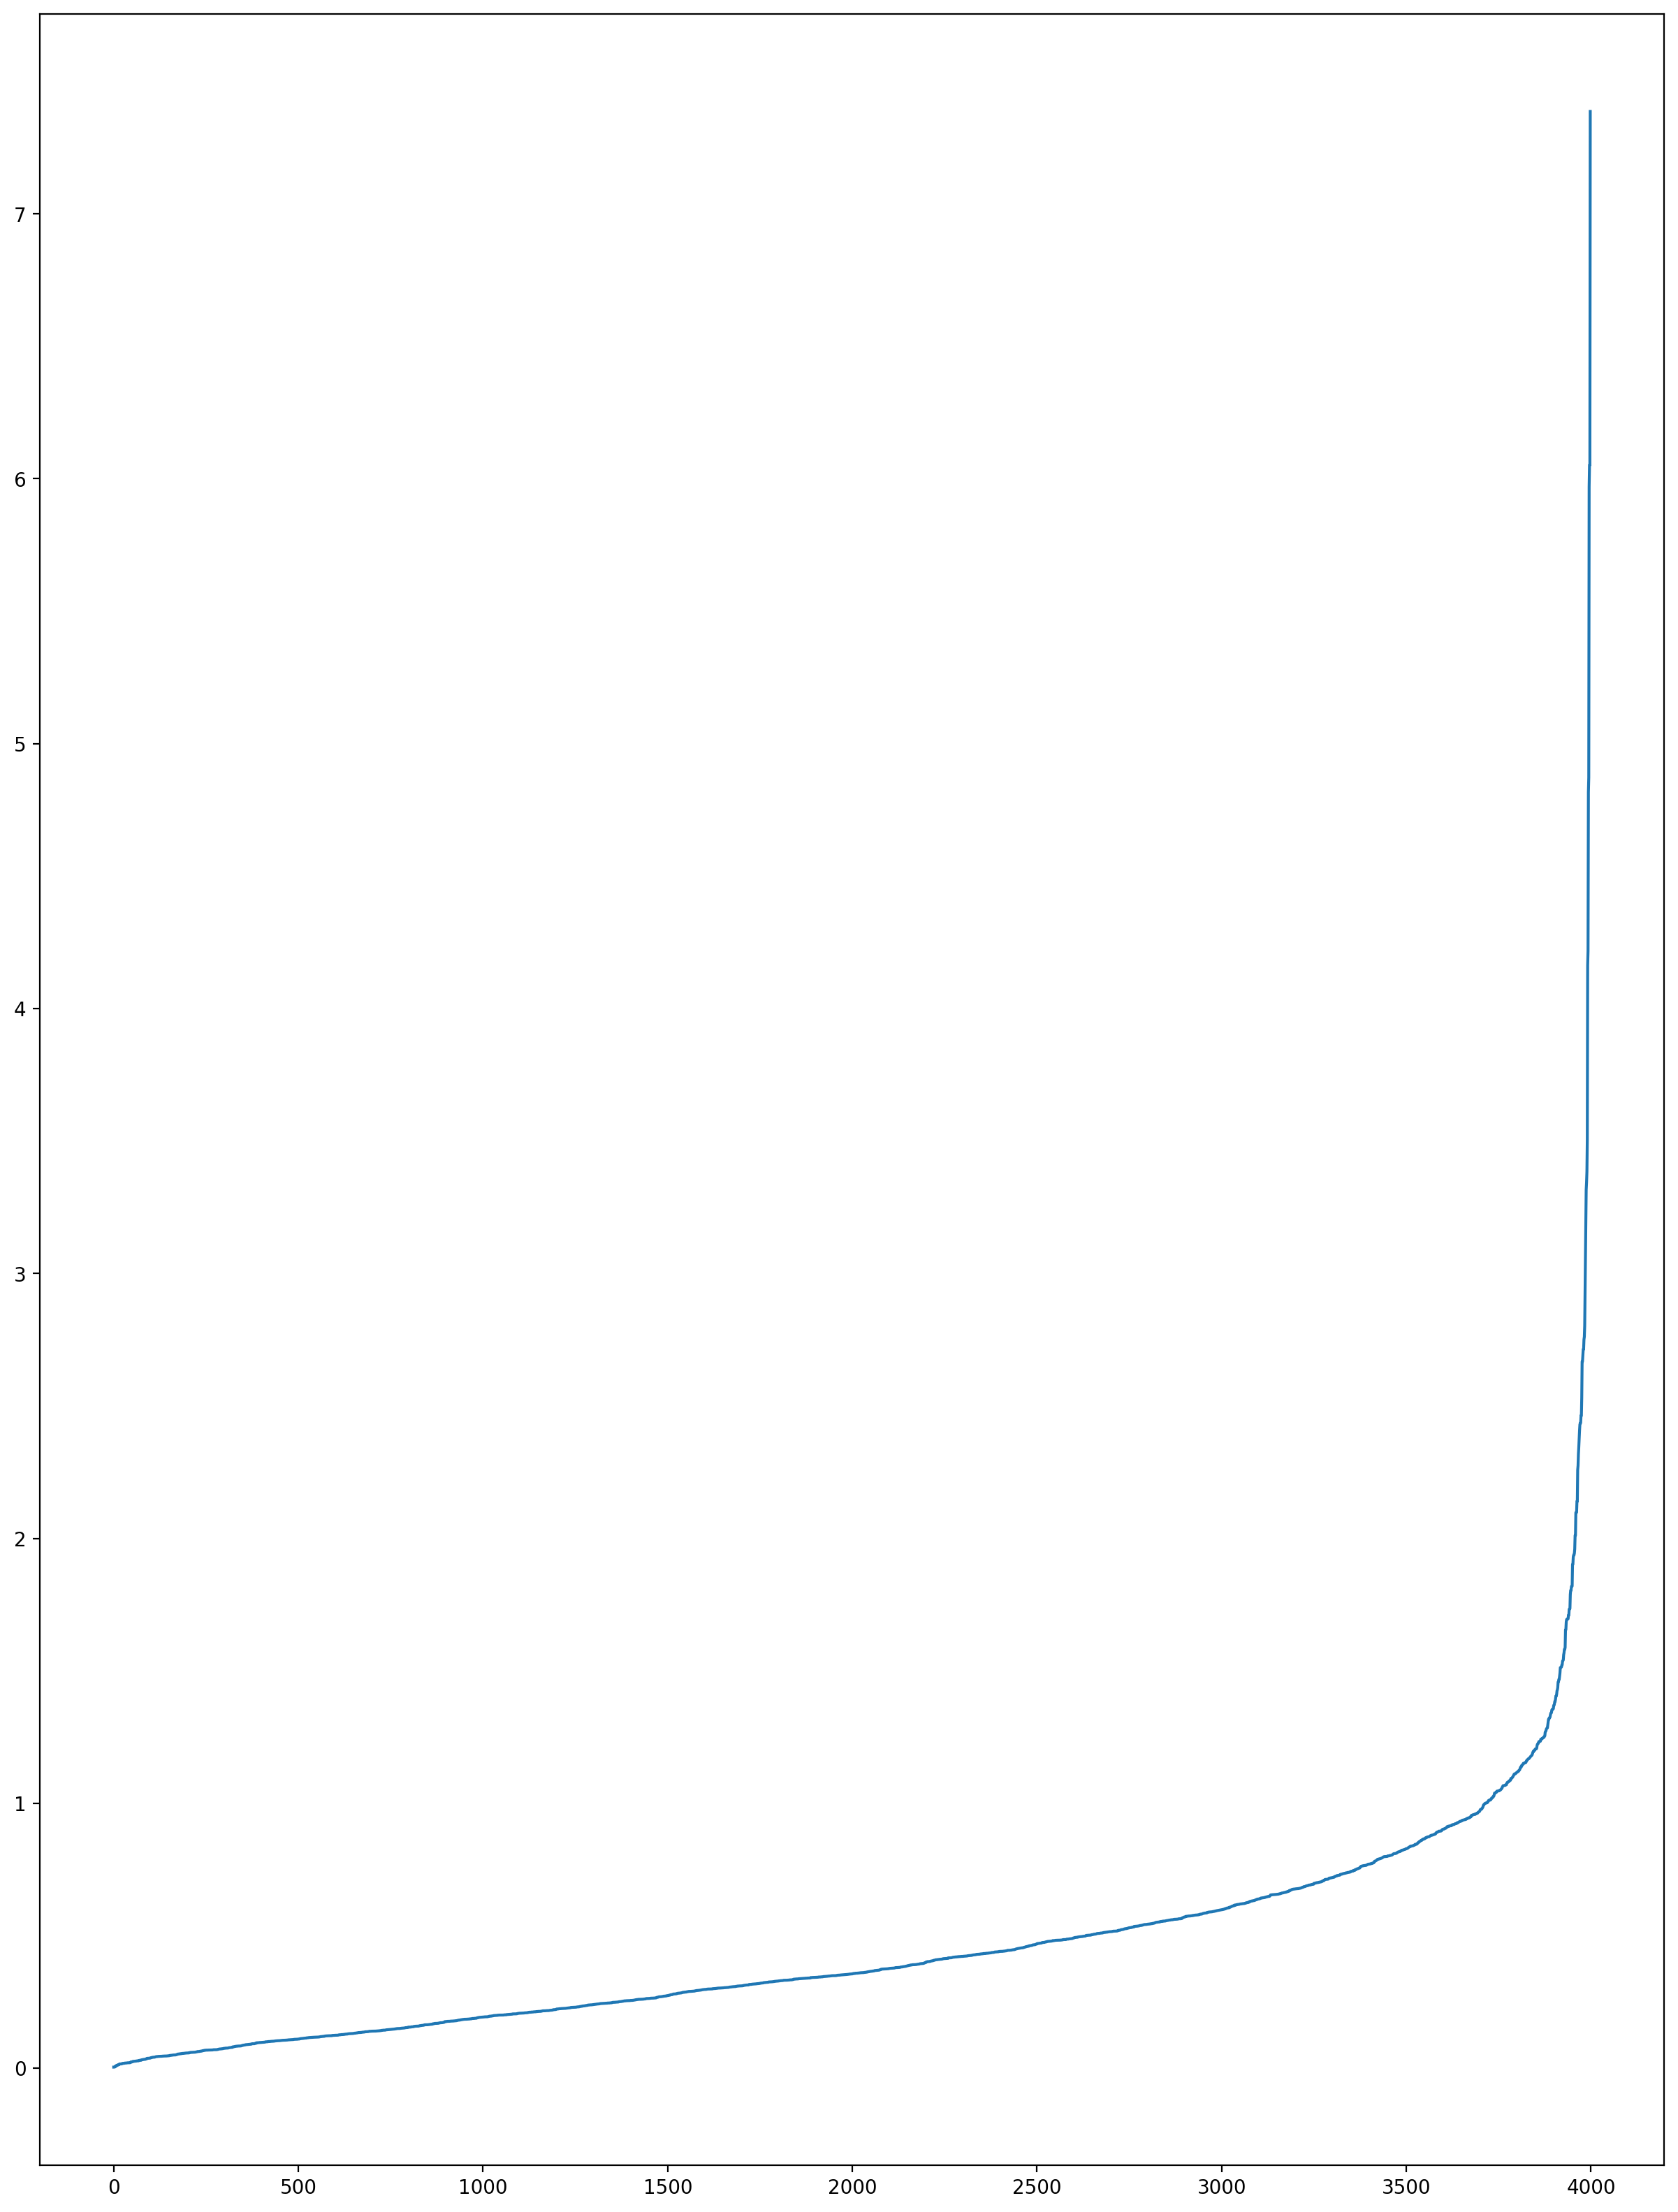

In [243]:
plt.plot(dist)

In [245]:
db=DBSCAN(eps=1,min_samples=3)

In [247]:
y=db.fit_predict(x)

In [249]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [252]:
sh=silhouette_score(x,y)

In [254]:
sh

-0.10589932231931293